In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install numpy==1.26.4
!pip install shap==0.41.0
import numpy as np
import shap

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime
import random
import os
import math

import warnings

# Ignore specific UserWarning
warnings.filterwarnings("ignore", message="X does not have valid feature names*")

# Reading the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sudha-Thesis/Depression_Dataset_of_Bangladeshi_Public_University_Students (2).csv')

In [ ]:
df.head()

,Gender,Year,CGPA,Family Status,Relationship Status,Financial Stress,Previous Experiences of Extreme Ragging,Session Jam,Social Circle,Adjustment Challenges,On Campus Mental Health Consultancy Service,Do you feel peer pressure?,University Educational System from your point of view,Do you feel depressed?
0,Male,2nd,3.0-3.5,Supportive,Single,Self Earner,Yes,Occasionally,Small,Yes,Absent,Yes,Stressful,Yes
1,Male,2nd,3.0-3.5,Moderate,Single,Self Earner,Yes,Frequently,Small,Yes,Absent,Yes,Stressful,Yes
2,Male,4th,3.5-3.8,Moderate,Single,Self Earner,Yes,Frequently,Moderate,Yes,Absent,No,Stressful,Yes
3,Male,2nd,3.0-3.5,Not Supportive,Single,Self Earner,Yes,Frequently,Small,Yes,Absent,Yes,Stressful,Yes
4,Male,4th,3.0-3.5,Supportive,Single,Supported by family,No,Occasionally,Moderate,Moderate,Present,No,Adjustable,No


In [ ]:
df.shape

(420, 14)

In [ ]:
df.nunique()

,0
Gender,2
Year,4
CGPA,4
Family Status,3
Relationship Status,2
Financial Stress,2
Previous Experiences of Extreme Ragging,2
Session Jam,2
Social Circle,3
Adjustment Challenges,3


In [ ]:
df.isnull().sum()

,0
Gender,0
Year,0
CGPA,0
Family Status,0
Relationship Status,0
Financial Stress,0
Previous Experiences of Extreme Ragging,0
Session Jam,0
Social Circle,0
Adjustment Challenges,0


# Preprocessing of the Dataset

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df = df.rename(columns={'On Campus Mental Health Consultancy Service': 'Consultancy Service'})
df = df.rename(columns={'Previous Experiences of Extreme Ragging': 'Extreme Ragging Issue'})
df = df.rename(columns={'Do you feel peer pressure?': 'Peer Pressure'})
df = df.rename(columns={'University Educational System from your point of view ': 'University Educational System'})
df = df.rename(columns={'Do you feel depressed?': 'Presence of Depression'})

In [ ]:
df

,Gender,Year,CGPA,Family Status,Relationship Status,Financial Stress,Extreme Ragging Issue,Session Jam,Social Circle,Adjustment Challenges,Consultancy Service,Peer Pressure,University Educational System,Presence of Depression
0,Male,2nd,3.0-3.5,Supportive,Single,Self Earner,Yes,Occasionally,Small,Yes,Absent,Yes,Stressful,Yes
1,Male,2nd,3.0-3.5,Moderate,Single,Self Earner,Yes,Frequently,Small,Yes,Absent,Yes,Stressful,Yes
2,Male,4th,3.5-3.8,Moderate,Single,Self Earner,Yes,Frequently,Moderate,Yes,Absent,No,Stressful,Yes
3,Male,2nd,3.0-3.5,Not Supportive,Single,Self Earner,Yes,Frequently,Small,Yes,Absent,Yes,Stressful,Yes
4,Male,4th,3.0-3.5,Supportive,Single,Supported by family,No,Occasionally,Moderate,Moderate,Present,No,Adjustable,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Female,2nd,3.0-3.5,Supportive,Single,Supported by family,No,Occasionally,Small,Yes,Absent,Yes,Stressful,Yes
416,Male,2nd,2.5-3.0,Moderate,Single,Self Earner,Yes,Occasionally,Small,Yes,Absent,Yes,Stressful,Yes
417,Female,2nd,3.5-3.8,Not Supportive,Single,Supported by family,No,Occasionally,Small,No,Absent,Yes,Stressful,Yes
418,Male,3rd,2.5-3.0,Supportive,Single,Supported by family,Yes,Occasionally,Moderate,Yes,Absent,Yes,Stressful,Yes


In [ ]:
df.columns

Index(['Gender', 'Year', 'CGPA', 'Family Status', 'Relationship Status',
       'Financial Stress', 'Extreme Ragging Issue', 'Session Jam',
       'Social Circle', 'Adjustment Challenges ', 'Consultancy Service',
       'Peer Pressure', 'University Educational System',
       'Presence of Depression'],
      dtype='object')

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

mapping = {'1st': 1, '2nd': 2, '3rd': 3, '4th': 4}
df['Year'] = df['Year'].map(lambda x: mapping.get(x.lower(), x))

# Define a custom function to round down the lower limit of the CGPA ranges
def floor_cgpa_range(cgpa_range):
    lower_limit = float(cgpa_range.split('-')[0].strip())
    return round(lower_limit, 2)  # rounding to two decimal places

# Apply the custom function to the 'CGPA' column
df['CGPA'] = df['CGPA'].apply(floor_cgpa_range)

df['Family Status'] = df['Family Status'].map({'Not Supportive': 2,'Moderate':1,'Supportive': 0})

df['Relationship Status'] = df['Relationship Status'].map({'Single': 1,'Married':0})

df['Financial Stress'] = df['Financial Stress'].map({'Self Earner': 0,'Supported by family':1})

df['Extreme Ragging Issue'] = df['Extreme Ragging Issue'].map({'Yes': 1,'No':0})

df['Session Jam'] = df['Session Jam'].map({'Frequently': 1,'Occasionally':0})

df['Social Circle'] = df['Social Circle'].map({'Small': 2,'Moderate':1, 'Large':0})

df['Adjustment Challenges '] = df['Adjustment Challenges '].map({'Yes': 2,'Moderate':1,'No': 0})

df['Consultancy Service'] = df['Consultancy Service'].map({'Absent': 1,'Present':0})

df['Peer Pressure'] = df['Peer Pressure'].map({'Yes': 1,'No':0})

df['University Educational System'] = df['University Educational System'].map({'Stressful': 1,'Adjustable':0})

df['Presence of Depression'] = df['Presence of Depression'].map({'Yes': 1, 'No': 0})

In [ ]:
df

,Gender,Year,CGPA,Family Status,Relationship Status,Financial Stress,Extreme Ragging Issue,Session Jam,Social Circle,Adjustment Challenges,Consultancy Service,Peer Pressure,University Educational System,Presence of Depression
0,1,2,3.0,0,1,0,1,0,2,2,1,1,1,1
1,1,2,3.0,1,1,0,1,1,2,2,1,1,1,1
2,1,4,3.5,1,1,0,1,1,1,2,1,0,1,1
3,1,2,3.0,2,1,0,1,1,2,2,1,1,1,1
4,1,4,3.0,0,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0,2,3.0,0,1,1,0,0,2,2,1,1,1,1
416,1,2,2.5,1,1,0,1,0,2,2,1,1,1,1
417,0,2,3.5,2,1,1,0,0,2,0,1,1,1,1
418,1,3,2.5,0,1,1,1,0,1,2,1,1,1,1


In [ ]:
df.isnull().sum()

,0
Gender,0
Year,0
CGPA,0
Family Status,0
Relationship Status,0
Financial Stress,0
Extreme Ragging Issue,0
Session Jam,0
Social Circle,0
Adjustment Challenges,0


In [ ]:
df.shape

(420, 14)

# Analysis of Recorded Data

In [ ]:
df.columns

Index(['Gender', 'Year', 'CGPA', 'Family Status', 'Relationship Status',
       'Financial Stress', 'Extreme Ragging Issue', 'Session Jam',
       'Social Circle', 'Adjustment Challenges ', 'Consultancy Service',
       'Peer Pressure', 'University Educational System',
       'Presence of Depression'],
      dtype='object')

 **1. Genderwise Depression Trend**

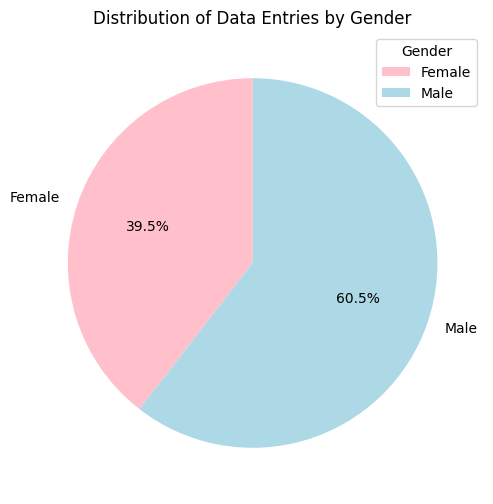

In [ ]:
# Count the number of entries per gender
gender_counts = df['Gender'].value_counts().sort_index()

# Labels for the pie chart, corresponding to the index of gender_counts
labels = ['Female' if idx == 0 else 'Male' for idx in gender_counts.index]

# Plotting the pie chart for Gender
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title('Distribution of Data Entries by Gender')
plt.legend(title='Gender')
plt.show()

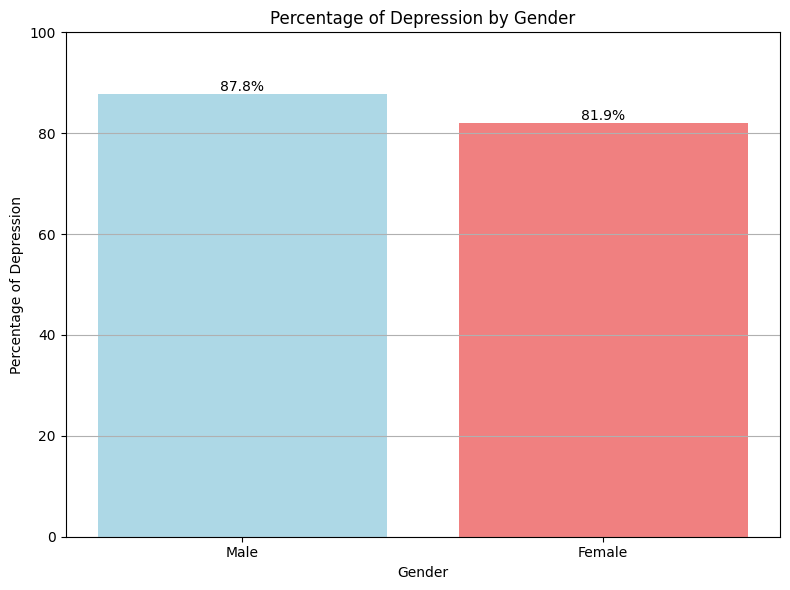

In [ ]:
# Split data into male and female
male_df = df[df['Gender'] == 1]
female_df = df[df['Gender'] == 0]

# Function to plot depression distribution for both genders
def plot_gender_distribution(male_df, female_df):
    # Calculate percentage of depression presence for males
    male_total = len(male_df)
    male_presence = (male_df['Presence of Depression'] == 1).sum()
    male_percentage = (male_presence / male_total) * 100

    # Calculate percentage of depression presence for females
    female_total = len(female_df)
    female_presence = (female_df['Presence of Depression'] == 1).sum()
    female_percentage = (female_presence / female_total) * 100

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.bar(['Male', 'Female'], [male_percentage, female_percentage], color=['lightblue', 'lightcoral'])

    # Add percentage labels to each bar for males
    plt.text(0, male_percentage, f'{male_percentage:.1f}%', ha='center', va='bottom', color='black')

    # Add percentage labels to each bar for females
    plt.text(1, female_percentage, f'{female_percentage:.1f}%', ha='center', va='bottom', color='black')

    plt.title('Percentage of Depression by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Percentage of Depression')
    plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
    plt.grid(axis='y')  # Add gridlines on y-axis
    plt.tight_layout()
    plt.show()

# Plot gender distribution
plot_gender_distribution(male_df, female_df)

 **2. Year-wise Depression Trend**

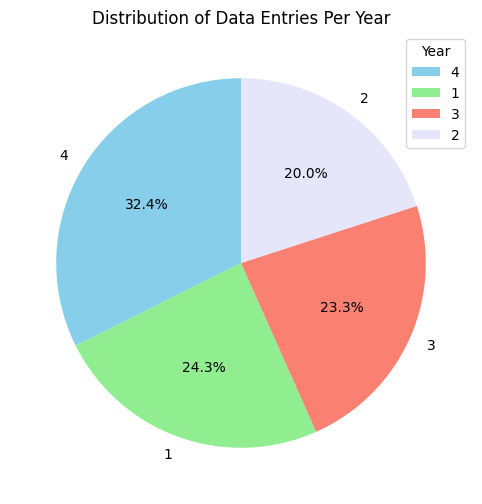

In [ ]:
# Count the number of entries per year
year_counts = df['Year'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'lavender'])
plt.title('Distribution of Data Entries Per Year')
plt.legend(title='Year')
plt.show()

 **3. Correlation between CGPA and Depression**

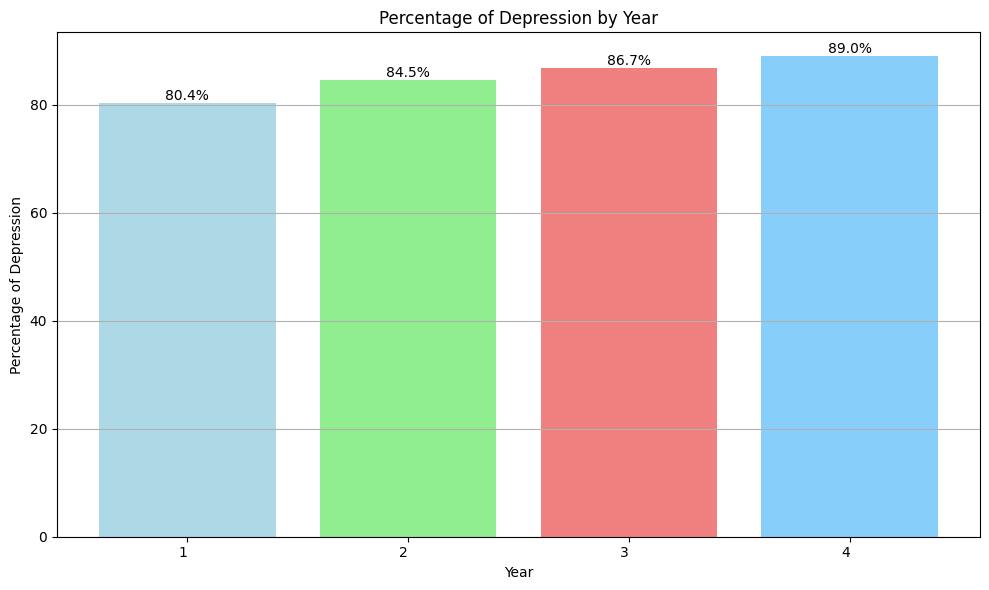

In [ ]:
# Function to plot data for all years in a single plot
def plot_yearly_data(df):
    # Group data by year and calculate percentage of depression presence
    grouped_data = df.groupby('Year')['Presence of Depression'].mean() * 100

    # Define colors for each bar
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(grouped_data)), grouped_data, color=colors)

    # Add percentage labels to each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', color='black')

    plt.title('Percentage of Depression by Year')
    plt.xlabel('Year')
    plt.ylabel('Percentage of Depression')
    plt.xticks(range(len(grouped_data)), grouped_data.index, rotation=0, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plot for all years present in the DataFrame
plot_yearly_data(df)

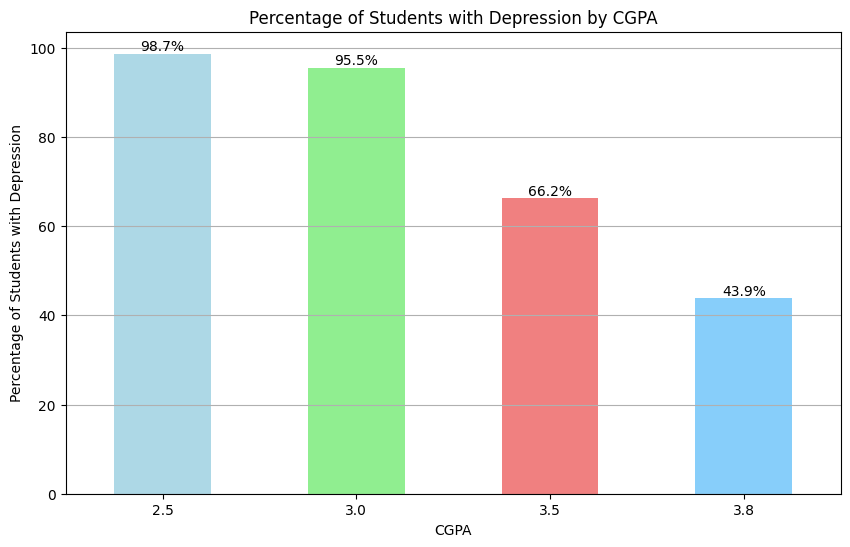

In [ ]:
# Calculate the total number of students for each CGPA value
total_students = df.groupby('CGPA').size()

# Calculate the number of students with depression for each CGPA value
depressed_students = df[df['Presence of Depression'] == 1].groupby('CGPA').size()

# Calculate the percentage of students with depression for each CGPA value
depression_percentage = (depressed_students / total_students) * 100

# Define colors for each bar
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# Plotting
plt.figure(figsize=(10, 6))
bars = depression_percentage.plot(kind='bar', color=colors)

# Add percentage labels to each bar
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', color='black')

plt.title('Percentage of Students with Depression by CGPA')
plt.xlabel('CGPA')
plt.ylabel('Percentage of Students with Depression')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines on y-axis
plt.show()

 **4. Correlation between Family Status and Depression**

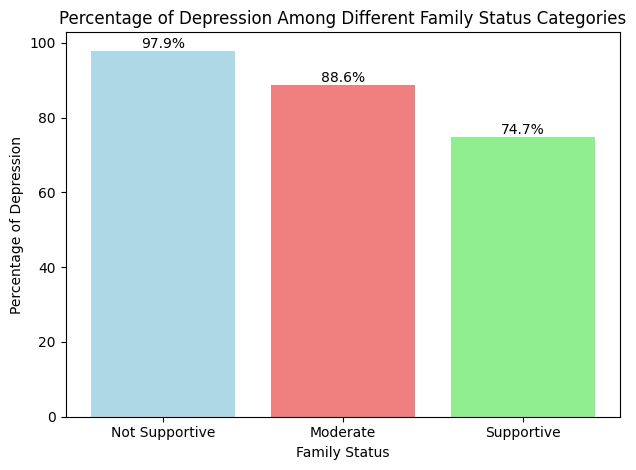

In [ ]:
# Define labels for Family Status categories
family_status_labels = {'Not Supportive': 2, 'Moderate': 1, 'Supportive': 0}

# Initialize lists to store percentages
percentages = []

# Iterate over each category of Family Status
for family_status_category, label in family_status_labels.items():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Family Status'] == label]

    # Count occurrences of depression within the filtered DataFrame
    depression_count = filtered_df['Presence of Depression'].sum()
    total_count = len(filtered_df)

    # Calculate percentage of depression
    if total_count > 0:  # Avoid division by zero
        percentage = (depression_count / total_count) * 100
    else:
        percentage = 0.0  # Set percentage to 0 if there are no students in this category

    # Append percentage to list
    percentages.append(percentage)

# Plot bar chart
plt.bar(family_status_labels.keys(), percentages, color=['lightblue', 'lightcoral', 'lightgreen'])

# Add percentage labels on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Customize plot
plt.xlabel('Family Status')
plt.ylabel('Percentage of Depression')
plt.title('Percentage of Depression Among Different Family Status Categories')

# Show plot
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


 **4. Correlation between Relationship Status and Depression**

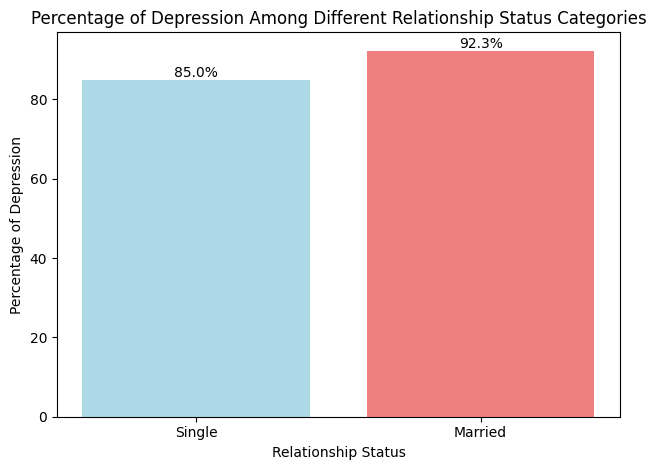

In [ ]:
# Define labels for Relationship Status categories
relational_status_labels = {'Single': 1, 'Married': 0}

# Initialize lists to store percentages
percentages = []

# Iterate over each category of Relationship Status
for relational_status_category, label in relational_status_labels.items():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Relationship Status'] == label]

    # Count occurrences of depression within the filtered DataFrame
    depression_count = filtered_df['Presence of Depression'].sum()
    total_count = len(filtered_df)

    # Calculate percentage of depression
    if total_count > 0:  # Avoid division by zero
        percentage = (depression_count / total_count) * 100
    else:
        percentage = 0.0  # Set percentage to 0 if there are no students in this category

    # Append percentage to list
    percentages.append(percentage)

# Plot bar chart
plt.bar(relational_status_labels.keys(), percentages, color=['lightblue', 'lightcoral'])

# Add percentage labels on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Customize plot
plt.xlabel('Relationship Status')
plt.ylabel('Percentage of Depression')
plt.title('Percentage of Depression Among Different Relationship Status Categories')

# Show plot
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


**5. Financial Stress vs Depression**

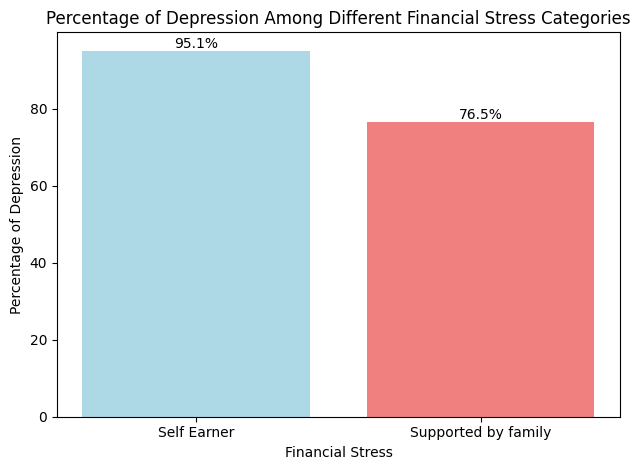

In [ ]:
# Define labels for Financial Stress categories
financial_stress_labels = {'Self Earner': 0, 'Supported by family': 1}

# Initialize lists to store percentages
percentages = []

# Iterate over each category of Financial Stress
for financial_stress_category, label in financial_stress_labels.items():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Financial Stress'] == label]

    # Count occurrences of depression within the filtered DataFrame
    depression_count = filtered_df['Presence of Depression'].sum()
    total_count = len(filtered_df)

    # Calculate percentage of depression
    if total_count > 0:  # Avoid division by zero
        percentage = (depression_count / total_count) * 100
    else:
        percentage = 0.0  # Set percentage to 0 if there are no students in this category

    # Append percentage to list
    percentages.append(percentage)

# Plot bar chart
plt.bar(financial_stress_labels.keys(), percentages, color=['lightblue', 'lightcoral'])

# Add percentage labels on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Customize plot
plt.xlabel('Financial Stress')
plt.ylabel('Percentage of Depression')
plt.title('Percentage of Depression Among Different Financial Stress Categories')

# Show plot
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


**6.Extreme Ragging vs Depression**

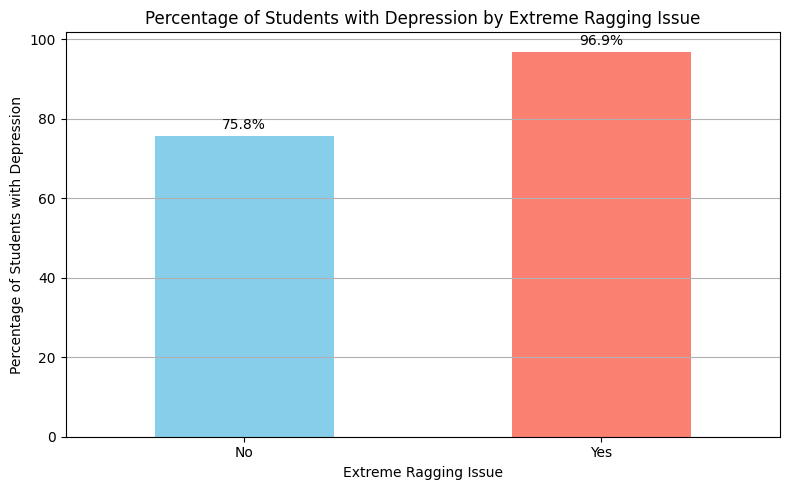

In [ ]:
# Calculate the total number of students for each Extreme Ragging category
total_students = df.groupby('Extreme Ragging Issue').size()

# Calculate the number of students with depression for each Extreme Ragging category
depressed_students = df[df['Presence of Depression'] == 1].groupby('Extreme Ragging Issue').size()

# Calculate the percentage of students with depression for each Extreme Ragging category
depression_percentage = (depressed_students / total_students) * 100

# Define colors for each Extreme Ragging category
colors = ['skyblue', 'salmon']

# Plotting
plt.figure(figsize=(8, 5))
bars = depression_percentage.plot(kind='bar', color=colors)

# Add percentage labels to each bar
for i, percentage in enumerate(depression_percentage):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Students with Depression by Extreme Ragging Issue')
plt.xlabel('Extreme Ragging Issue')
plt.ylabel('Percentage of Students with Depression')
plt.xticks(range(len(depression_percentage.index)), ['No', 'Yes'], rotation=0)  # Update x-axis labels
plt.grid(axis='y')  # Add gridlines on y-axis
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

**7.Session Jam vs Depression**

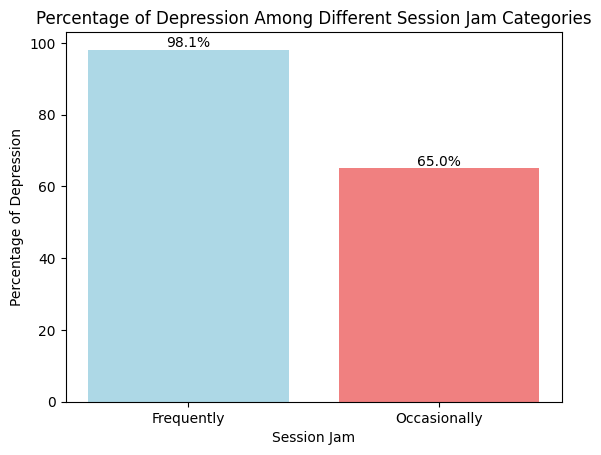

In [ ]:
# Define labels for Session Jam categories
session_jam_labels = {1: 'Frequently', 0: 'Occasionally'}

# Initialize lists to store percentages
percentages = []

# Iterate over each category of Session Jam
for session_jam_category, label in session_jam_labels.items():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Session Jam'] == session_jam_category]

    # Count occurrences of depression within the filtered DataFrame
    depression_count = filtered_df['Presence of Depression'].sum()
    total_count = len(filtered_df)

    # Calculate percentage of depression
    percentage = (depression_count / total_count) * 100 if total_count != 0 else 0

    # Append percentage to list
    percentages.append(percentage)

# Plot bar chart
plt.bar(session_jam_labels.values(), percentages, color=['lightblue', 'lightcoral'])

# Add percentage labels on the bars
for label, percentage in zip(session_jam_labels.values(), percentages):
    plt.text(label, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Customize plot
plt.xlabel('Session Jam')
plt.ylabel('Percentage of Depression')
plt.title('Percentage of Depression Among Different Session Jam Categories')

# Show plot
plt.show()

**8.Social Circle vs Depression**

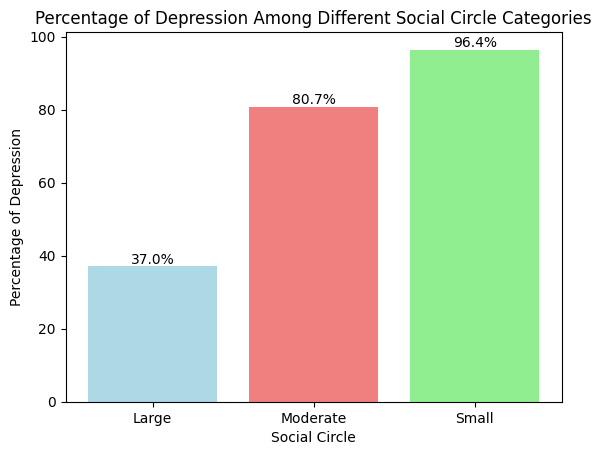

In [ ]:
# Define labels for Social Circle categories
social_circle_labels = {0: 'Large', 1: 'Moderate', 2: 'Small'}

# Initialize lists to store percentages
percentages = []

# Iterate over each category of Social Circle
for social_circle_category in range(3):
    # Filter the DataFrame for the current category
    filtered_df = df[df['Social Circle'] == social_circle_category]

    # Count occurrences of depression within the filtered DataFrame
    depression_count = filtered_df['Presence of Depression'].sum()
    total_count = len(filtered_df)

    # Calculate percentage of depression
    percentage = (depression_count / total_count) * 100

    # Append percentage to list
    percentages.append(percentage)

# Plot bar chart
plt.bar(social_circle_labels.values(), percentages, color=['lightblue', 'lightcoral', 'lightgreen'])

# Add percentage labels on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Customize plot
plt.xlabel('Social Circle')
plt.ylabel('Percentage of Depression')
plt.title('Percentage of Depression Among Different Social Circle Categories')

# Show plot
plt.show()

**9.Adjustment Challenges and Depression**

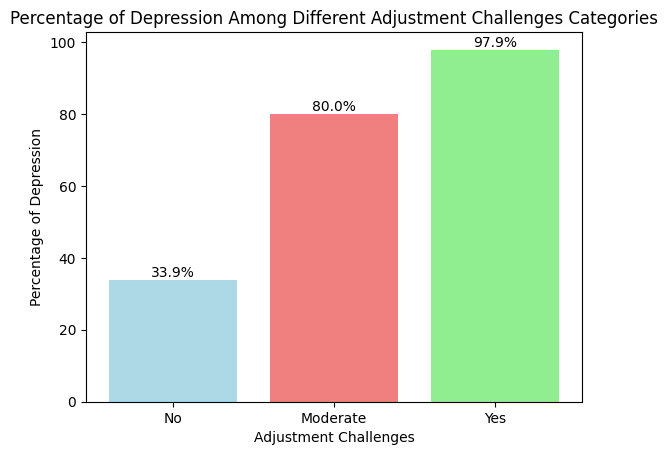

In [ ]:
# Define labels for Adjustment Challenges categories
adjustment_challenges_labels = {0: 'No', 1: 'Moderate', 2: 'Yes'}

# Initialize lists to store percentages
percentages = []

# Iterate over each category of Adjustment Challenges
for adjustment_challenges_category, label in adjustment_challenges_labels.items():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Adjustment Challenges '] == adjustment_challenges_category]

    # Count occurrences of depression within the filtered DataFrame
    depression_count = filtered_df['Presence of Depression'].sum()
    total_count = len(filtered_df)

    # Calculate percentage of depression
    if total_count > 0:  # Avoid division by zero
        percentage = (depression_count / total_count) * 100
    else:
        percentage = 0.0  # Set percentage to 0 if there are no students in this category

    # Append percentage to list
    percentages.append(percentage)

# Plot bar chart
plt.bar(adjustment_challenges_labels.values(), percentages, color=['lightblue', 'lightcoral', 'lightgreen'])

# Add percentage labels on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Customize plot
plt.xlabel('Adjustment Challenges')
plt.ylabel('Percentage of Depression')
plt.title('Percentage of Depression Among Different Adjustment Challenges Categories')

# Show plot
plt.show()


**10.Consultancy Service vs Depression**

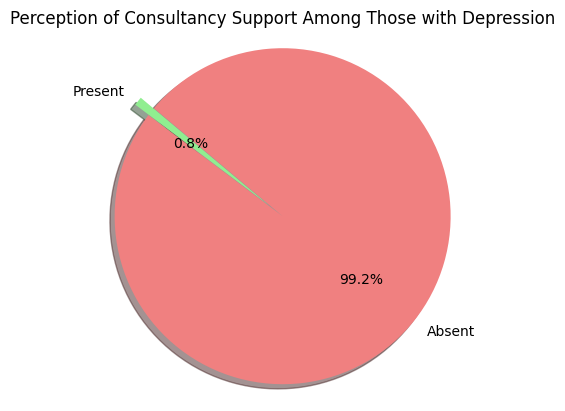

In [ ]:
# Filter out entries with "Presence of Depression" as Yes
filtered_df = df[df["Presence of Depression"] == 1]

# Count occurrences of each level of Consultancy Service among those with depression
count_present = (filtered_df["Consultancy Service"] == 0).sum()
count_absent = (filtered_df["Consultancy Service"] == 1).sum()

# Calculate percentages
total_entries = len(filtered_df)
percent_present = (count_present / total_entries) * 100
percent_absent = (count_absent / total_entries) * 100

# Plot pie chart
labels = ['Present', 'Absent']
sizes = [percent_present, percent_absent]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Perception of Consultancy Support Among Those with Depression')
plt.show()

**11.Peer Pressure vs Depression**

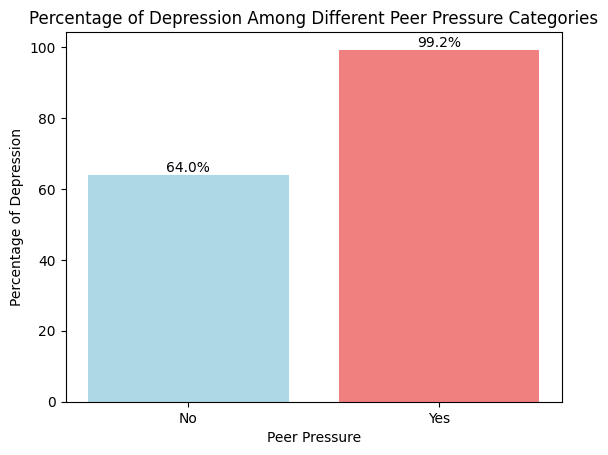

In [ ]:
# Define labels for Peer Pressure categories
session_jam_labels = {0: 'No', 1: 'Yes'}

# Initialize lists to store percentages
percentages = []

# Iterate over each category of Peer Pressure
for peer_pressure_category in range(2):  # Changed range to 2 since there are only 2 categories
    # Filter the DataFrame for the current category
    filtered_df = df[df['Peer Pressure'] == peer_pressure_category]

    # Count occurrences of depression within the filtered DataFrame
    depression_count = filtered_df['Presence of Depression'].sum()
    total_count = len(filtered_df)

    # Calculate percentage of depression
    percentage = (depression_count / total_count) * 100

    # Append percentage to list
    percentages.append(percentage)

# Plot bar chart
plt.bar(session_jam_labels.values(), percentages, color=['lightblue', 'lightcoral'])

# Add percentage labels on the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Customize plot
plt.xlabel('Peer Pressure')
plt.ylabel('Percentage of Depression')
plt.title('Percentage of Depression Among Different Peer Pressure Categories')

# Show plot
plt.show()

**12.University Educational System vs Depression**

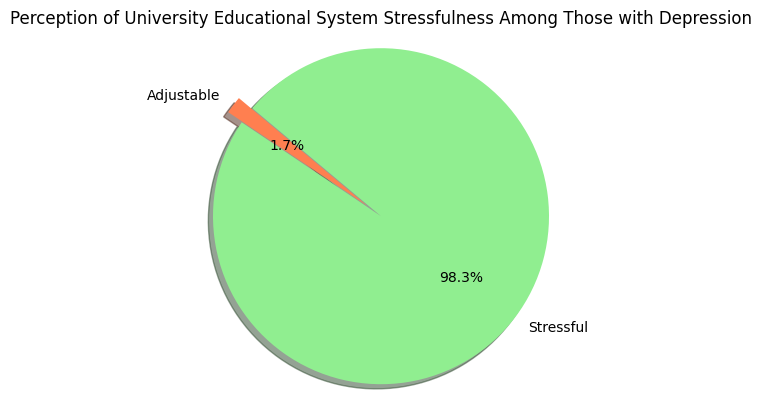

In [ ]:
# Filter out entries with "Presence of Depression" as Yes
filtered_df = df[df["Presence of Depression"] == 1]

# Count occurrences of each level of University Educational System among those with depression
count_adjustable = (filtered_df["University Educational System"] == 0).sum()
count_stressful = (filtered_df["University Educational System"] == 1).sum()

# Calculate percentages
total_entries = len(filtered_df)
percent_adjustable = (count_adjustable / total_entries) * 100
percent_stressful = (count_stressful / total_entries) * 100

# Plot pie chart
labels = ['Adjustable', 'Stressful']
sizes = [percent_adjustable, percent_stressful]
colors = ['coral', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Perception of University Educational System Stressfulness Among Those with Depression')
plt.show()

In [ ]:
df.columns

Index(['Gender', 'Year', 'CGPA', 'Family Status', 'Relationship Status',
       'Financial Stress', 'Extreme Ragging Issue', 'Session Jam',
       'Social Circle', 'Adjustment Challenges ', 'Consultancy Service',
       'Peer Pressure', 'University Educational System',
       'Presence of Depression'],
      dtype='object')

In [ ]:
df

,Gender,Year,CGPA,Family Status,Relationship Status,Financial Stress,Extreme Ragging Issue,Session Jam,Social Circle,Adjustment Challenges,Consultancy Service,Peer Pressure,University Educational System,Presence of Depression
0,1,2,3.0,0,1,0,1,0,2,2,1,1,1,1
1,1,2,3.0,1,1,0,1,1,2,2,1,1,1,1
2,1,4,3.5,1,1,0,1,1,1,2,1,0,1,1
3,1,2,3.0,2,1,0,1,1,2,2,1,1,1,1
4,1,4,3.0,0,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0,2,3.0,0,1,1,0,0,2,2,1,1,1,1
416,1,2,2.5,1,1,0,1,0,2,2,1,1,1,1
417,0,2,3.5,2,1,1,0,0,2,0,1,1,1,1
418,1,3,2.5,0,1,1,1,0,1,2,1,1,1,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Features (X) and target variable (y)
X = df[['Gender', 'Year', 'CGPA', 'Family Status', 'Relationship Status', 'Financial Stress', 'Extreme Ragging Issue', 'Session Jam', 'Social Circle', 'Adjustment Challenges ', 'Consultancy Service','Peer Pressure', 'University Educational System' ]]
y = df['Presence of Depression']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest Classifier**

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(criterion="gini",
                                       max_depth=8,
                                       min_samples_split=10,
                                       random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [ ]:
# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.9761904761904762
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.97      1.00      0.99        71

    accuracy                           0.98        84
   macro avg       0.99      0.92      0.95        84
weighted avg       0.98      0.98      0.98        84



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

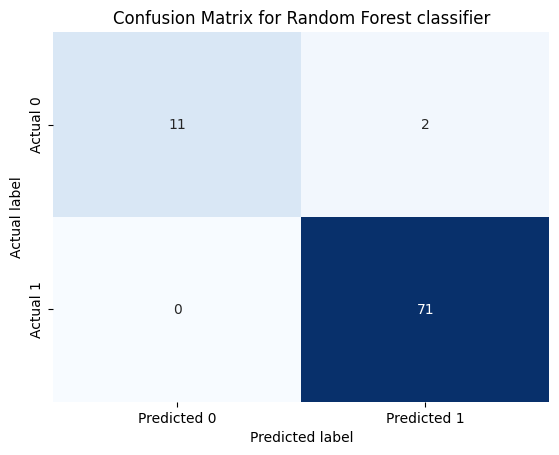

In [ ]:
import seaborn as sns
# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for Random Forest classifier')

# Show the plot
plt.show()


Top 10 Features by mean |SHAP| (Random Forest):
                          Feature  Mean |SHAP|
10            Consultancy Service     0.067057
12  University Educational System     0.060181
11                  Peer Pressure     0.033138
2                            CGPA     0.030990
8                   Social Circle     0.029545
7                     Session Jam     0.029243
9          Adjustment Challenges      0.020946
6           Extreme Ragging Issue     0.007306
3                   Family Status     0.006302
5                Financial Stress     0.005015


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


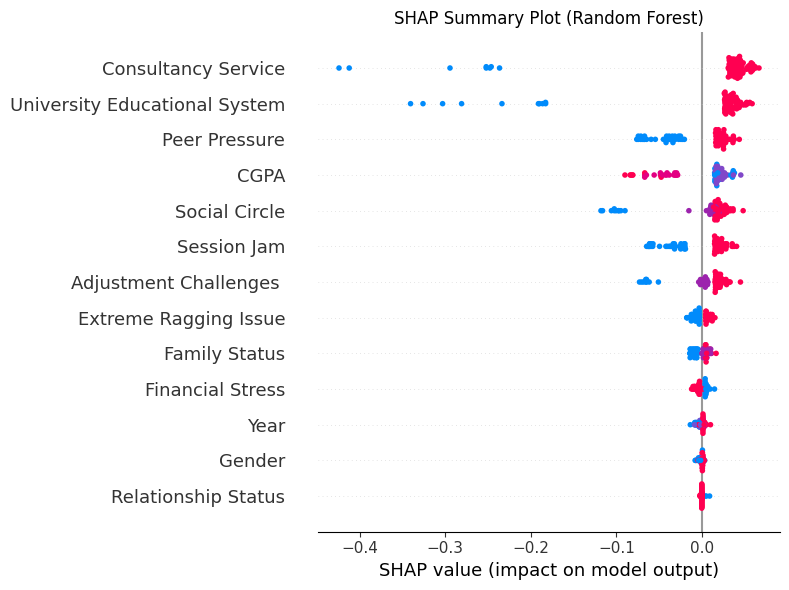

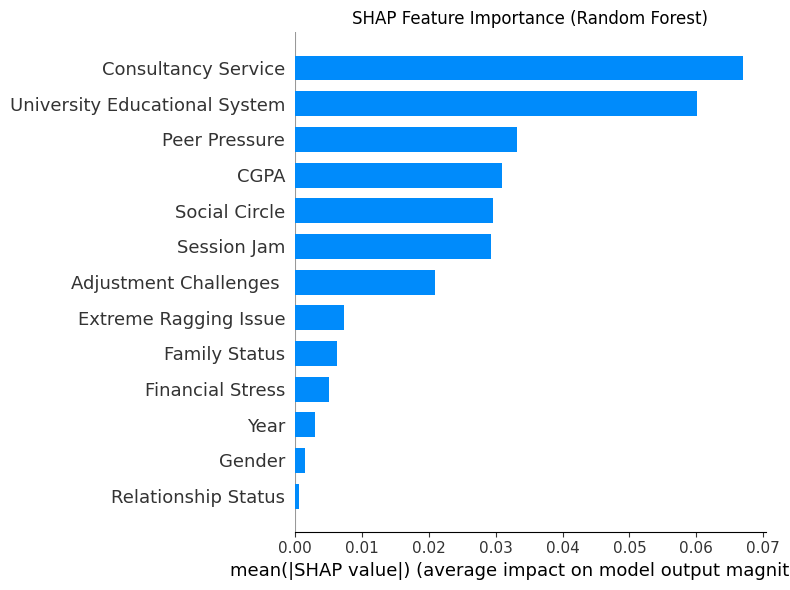

<Figure size 640x480 with 0 Axes>

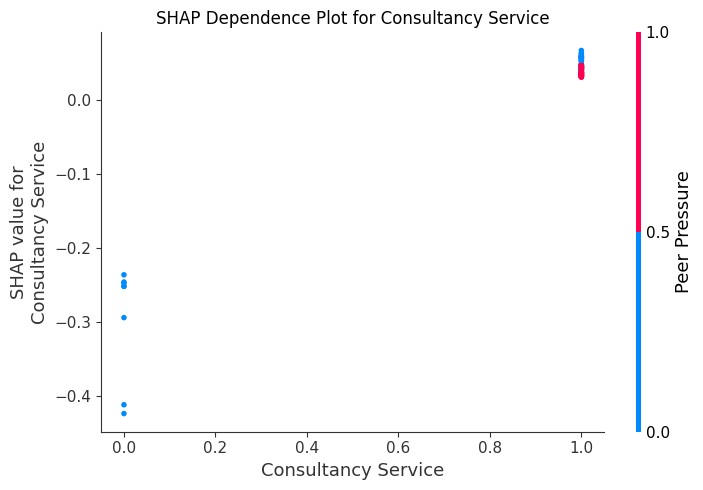

<Figure size 640x480 with 0 Axes>

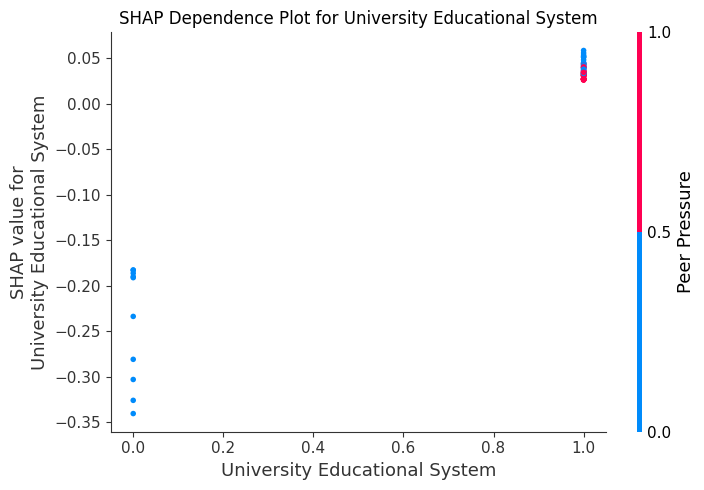


✅ All SHAP results saved in: /content/drive/MyDrive/Sudha-Thesis/SHAP_Plots_RF


In [ ]:
# ==============================
# SHAP Explainability Section
# ==============================

# --- Patch NumPy deprecations for SHAP ---
import numpy as np
if not hasattr(np, 'bool'):
    np.bool = np.bool_
if not hasattr(np, 'float'):
    np.float = np.float64   # <--- important fix

import shap
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure DataFrames with correct feature names
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

# --- Random Forest SHAP (TreeExplainer) ---
explainer_rf = shap.TreeExplainer(rf_classifier)
shap_values_rf = explainer_rf.shap_values(X_test_df)

# shap_values_rf is [class0, class1] for binary clf
shap_vals = shap_values_rf[1] if isinstance(shap_values_rf, list) else shap_values_rf

# --- Global importance ranking ---
mean_abs_shap = np.abs(shap_vals).mean(axis=0)
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean |SHAP|": mean_abs_shap
}).sort_values("Mean |SHAP|", ascending=False)

print("\nTop 10 Features by mean |SHAP| (Random Forest):")
print(importance_df.head(10))

# Save ranked feature table
save_dir = "/content/drive/MyDrive/Sudha-Thesis/SHAP_Plots_RF"
os.makedirs(save_dir, exist_ok=True)
importance_df.to_csv(os.path.join(save_dir, "SHAP_top10_RF.csv"), index=False)

# --- Beeswarm summary plot ---
plt.figure(figsize=(8,6))
shap.summary_plot(shap_vals, X_test_df, show=False, plot_size=(8,6), color_bar=False)
plt.title("SHAP Summary Plot (Random Forest)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "SHAP_beeswarm_RF.png"))
plt.show()

# --- Bar plot of mean absolute SHAP values ---
plt.figure(figsize=(8,6))
shap.summary_plot(shap_vals, X_test_df, plot_type="bar", show=False, plot_size=(8,6), color_bar=False)
plt.title("SHAP Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "SHAP_bar_RF.png"))
plt.show()

# --- Dependence plots for top 2 features ---
top2 = importance_df["Feature"].head(2).tolist()
for feat in top2:
    plt.figure()
    shap.dependence_plot(feat, shap_vals, X_test_df, show=False)
    plt.title(f"SHAP Dependence Plot for {feat}")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"SHAP_dependence_{feat}.png"))
    plt.show()

print(f"\n✅ All SHAP results saved in: {save_dir}")


In [ ]:
# Define a simulated test dataset with features
# For simplicity, we'll create a single sample with some values for each feature
#Gender:Male(1)
#Year:3rd(3)
#CGPA: 3.0
#Family Status: Not Supportive(2)
#Relationship Status: Single(1)
#Financial Stress: Self Earner(0)
#Extreme Ragging Issue: Yes(1)
#Session Jam: Frequently(1)
#Social Circle: Small(2)
#Adjustment Challenges: Moderate(1)
#Consultancy Service : Absent(1)
#Peer Pressure: Yes(1)
#University Educational System: Stressful(1)



test_sample = np.array([[1, 3, 3.0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1]])

# Use the trained Random Forest classifier to predict the target variable for the test sample
predicted_label = rf_classifier.predict(test_sample)

# Output the prediction
if predicted_label == 1:
    print("Depressed")
else:
    print("Not Depressed")



Depressed


In [ ]:
import joblib
import os

# Create the directory if it does not exist
model_dir = "/content/drive/MyDrive/Sudha-Thesis/Trained Model-RF"
os.makedirs(model_dir, exist_ok=True)

# Define model path
model_path = os.path.join(model_dir, "model.pkl")

# Save the model
joblib.dump(rf_classifier, model_path)

['/content/drive/MyDrive/Sudha-Thesis/Trained Model-RF/model.pkl']

**SVM Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Optionally, you can make predictions and evaluate the model
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM classifier on test set: {:.4f}".format(accuracy))

Accuracy of SVM classifier on test set: 0.9762


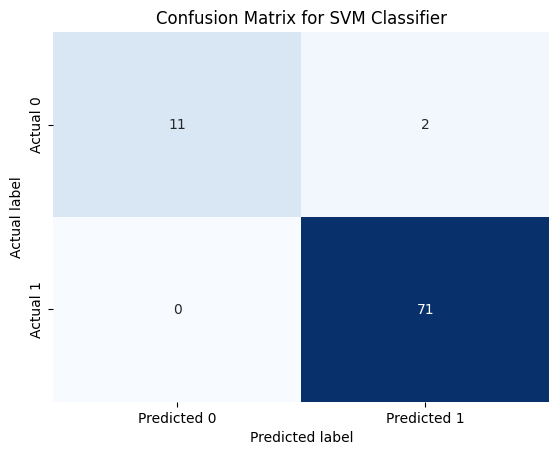

In [ ]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for SVM Classifier')

# Show the plot
plt.show()

In [ ]:
# Define a simulated test dataset with features
# For simplicity, we'll create a single sample with some values for each feature
#Gender:Male(1)
#Year:3rd(3)
#CGPA: 3.0
#Family Status: Not Supportive(2)
#Relationship Status: Single(1)
#Financial Stress: Self Earner(0)
#Extreme Ragging Issue: Yes(1)
#Session Jam: Frequently(1)
#Social Circle: Small(2)
#Adjustment Challenges: Moderate(1)
#Consultancy Service : Absent(1)
#Peer Pressure: Yes(1)
#University Educational System: Stressful(1)



test_sample = np.array([[1, 3, 3.0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1]])

# Use the trained Random Forest classifier to predict the target variable for the test sample
predicted_label = svm_classifier.predict(test_sample)

# Output the prediction
if predicted_label == 1:
    print("Depressed")
else:
    print("Not Depressed")



Depressed


In [ ]:
model_dir = "/content/drive/MyDrive/Sudha-Thesis/Trained Model-SVM"
os.makedirs(model_dir, exist_ok=True)

# Define model path
model_path = os.path.join(model_dir, "model.pkl")

# Save the model
joblib.dump(rf_classifier, model_path)

['/content/drive/MyDrive/Sudha-Thesis/Trained Model-SVM/model.pkl']

**Logistic Regression Classifier**

Accuracy of Logistic Regression classifier on test set: 0.9524


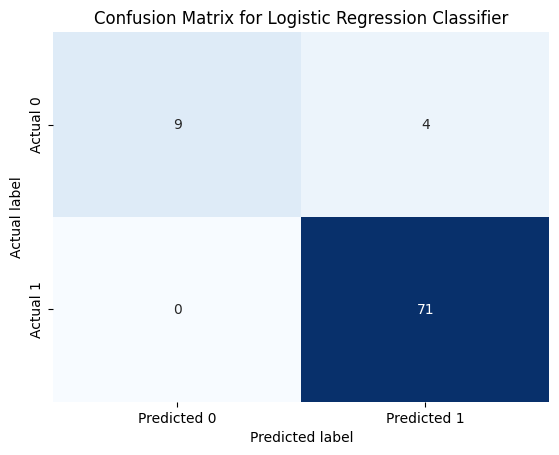

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)

# Fit the classifier to the training data
logreg_classifier.fit(X_train, y_train)

# Optionally, you can make predictions and evaluate the model
y_pred_logreg = logreg_classifier.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy of Logistic Regression classifier on test set: {:.4f}".format(accuracy_logreg))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Create a heatmap for the confusion matrix
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for Logistic Regression Classifier')

# Show the plot
plt.show()


In [ ]:
# Define a simulated test dataset with features
# For simplicity, we'll create a single sample with some values for each feature
#Gender:Male(1)
#Year:3rd(3)
#CGPA: 3.5
#Family Status: Supportive(0)
#Relationship Status: Single(1)
#Financial Stress: Supported by Family(1)
#Extreme Ragging Issue: No(0)
#Session Jam: Occassionally(0)
#Social Circle: Large(0)
#Adjustment Challenges: No(0)
#Consultancy Service : Present(0)
#Peer Pressure: No(0)
#University Educational System: Adjustable(0)



test_sample = np.array([[1, 3, 3.5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

# Use the trained Random Forest classifier to predict the target variable for the test sample
predicted_label = logreg_classifier.predict(test_sample)

# Output the prediction
if predicted_label == 1:
    print("Depressed")
else:
    print("Not Depressed")



Not Depressed


**KNN Classifier**

Accuracy of KNN classifier on test set: 0.9524


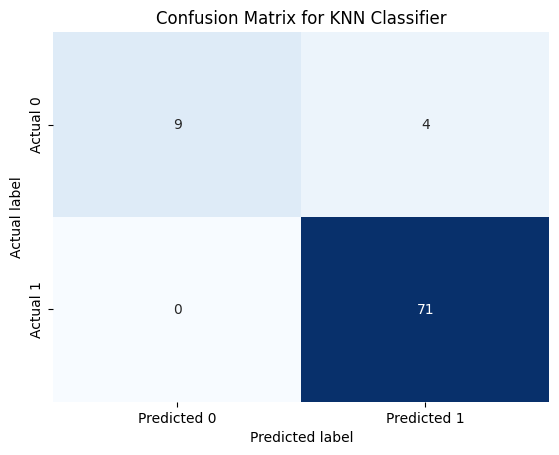

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Optionally, you can make predictions and evaluate the model
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN classifier on test set: {:.4f}".format(accuracy_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)

# Create a heatmap for the confusion matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for KNN Classifier')

# Show the plot
plt.show()


In [ ]:
# Define a simulated test dataset with features
# For simplicity, we'll create a single sample with some values for each feature
#Gender:Male(1)
#Year:3rd(3)
#CGPA: 3.5
#Family Status: Supportive(0)
#Relationship Status: Single(1)
#Financial Stress: Supported by Family(1)
#Extreme Ragging Issue: No(0)
#Session Jam: Occassionally(0)
#Social Circle: Large(0)
#Adjustment Challenges: No(0)
#Consultancy Service : Present(0)
#Peer Pressure: No(0)
#University Educational System: Adjustable(0)



test_sample = np.array([[1, 3, 3.5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

# Use the trained Random Forest classifier to predict the target variable for the test sample
predicted_label = knn_classifier.predict(test_sample)

# Output the prediction
if predicted_label == 1:
    print("Depressed")
else:
    print("Not Depressed")



Not Depressed


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Define custom specificity scorer
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Create make_scorer object
specificity = make_scorer(specificity_score)

# Define all scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'specificity': specificity
}

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Evaluate each model using 5-fold cross-validation
for name, model in models.items():
    print(f"\n{name} Performance:")
    results = cross_validate(model, X, y, cv=5, scoring=scoring)
    for metric in scoring.keys():
        mean_score = results[f'test_{metric}'].mean()
        std_score = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean_score:.3f} ± {std_score:.3f}")



Random Forest Performance:
Accuracy: 0.969 ± 0.018
Precision: 0.981 ± 0.018
Recall: 0.983 ± 0.010
F1: 0.982 ± 0.010
Specificity: 0.887 ± 0.109

SVM Performance:
Accuracy: 0.976 ± 0.017
Precision: 0.984 ± 0.016
Recall: 0.989 ± 0.010
F1: 0.986 ± 0.010
Specificity: 0.903 ± 0.096

Logistic Regression Performance:
Accuracy: 0.967 ± 0.009
Precision: 0.973 ± 0.016
Recall: 0.989 ± 0.010
F1: 0.981 ± 0.005
Specificity: 0.837 ± 0.103

KNN Performance:
Accuracy: 0.952 ± 0.013
Precision: 0.962 ± 0.015
Recall: 0.983 ± 0.010
F1: 0.972 ± 0.007
Specificity: 0.772 ± 0.092


# SHAP Explainability


Explaining RandomForest with TreeExplainer...

Top 10 Features (RandomForest):
                          Feature  Mean |SHAP|
10            Consultancy Service     0.067057
12  University Educational System     0.060181
11                  Peer Pressure     0.033138
2                            CGPA     0.030990
8                   Social Circle     0.029545
7                     Session Jam     0.029243
9          Adjustment Challenges      0.020946
6           Extreme Ragging Issue     0.007306
3                   Family Status     0.006302
5                Financial Stress     0.005015


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


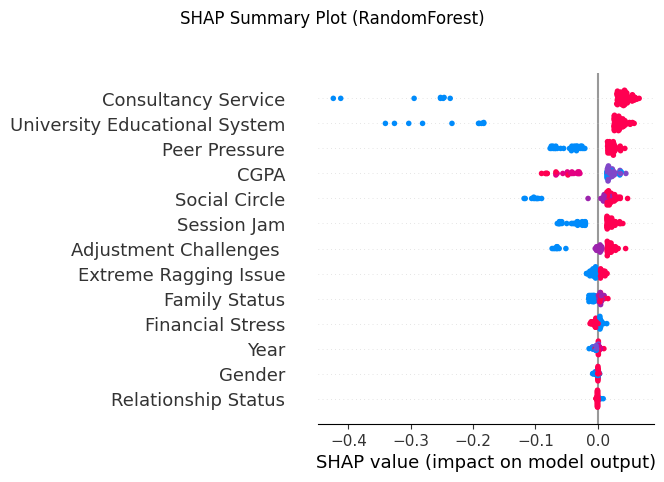

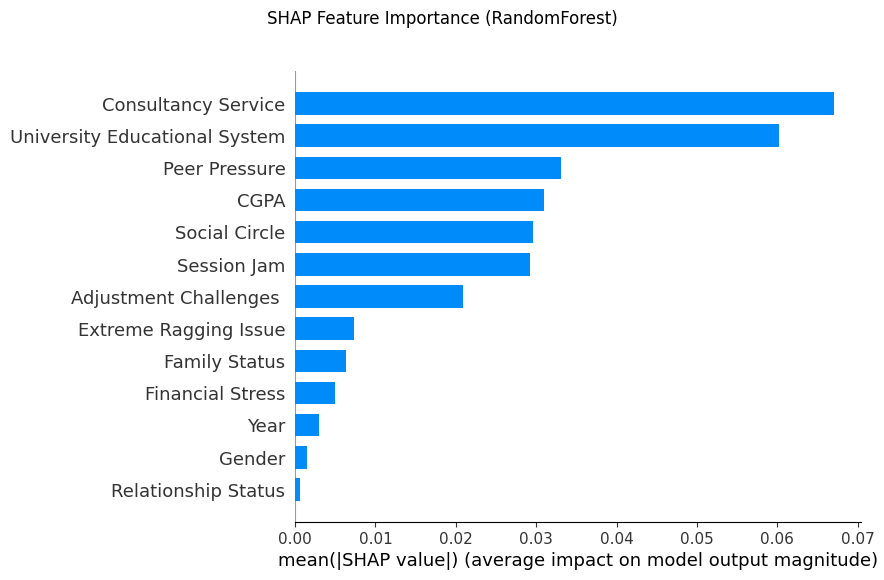

<Figure size 600x400 with 0 Axes>

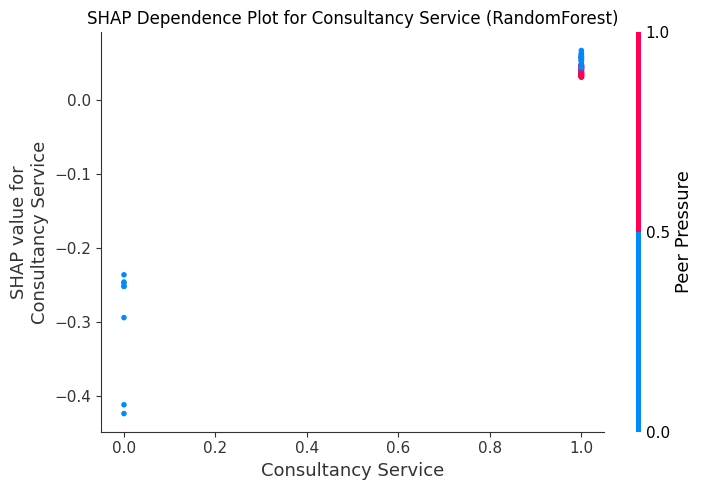

<Figure size 600x400 with 0 Axes>

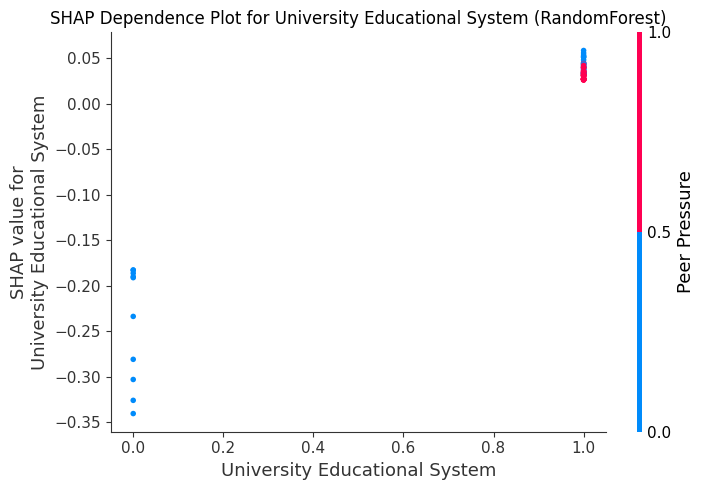


Explaining SVM with KernelExplainer... (subset of 100 samples)


  0%|          | 0/100 [00:00<?, ?it/s]


Top 10 Features (SVM):
                          Feature  Mean |SHAP|
12  University Educational System     0.101805
7                     Session Jam     0.061394
10            Consultancy Service     0.042012
4             Relationship Status     0.017237
6           Extreme Ragging Issue     0.006038
3                   Family Status     0.005352
9          Adjustment Challenges      0.004614
2                            CGPA     0.004140
5                Financial Stress     0.003448
8                   Social Circle     0.003374


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


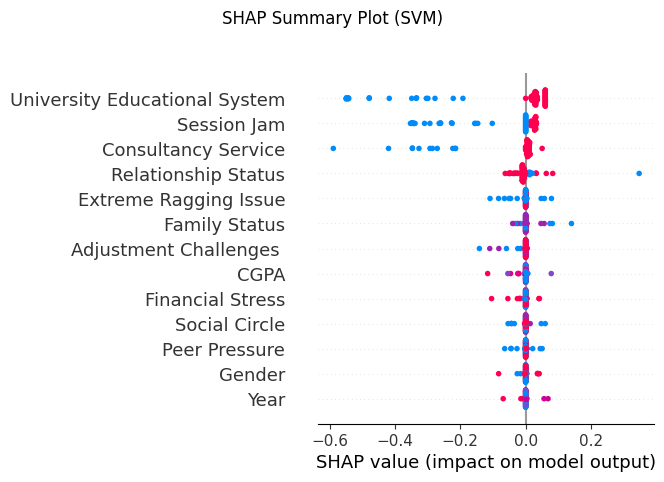

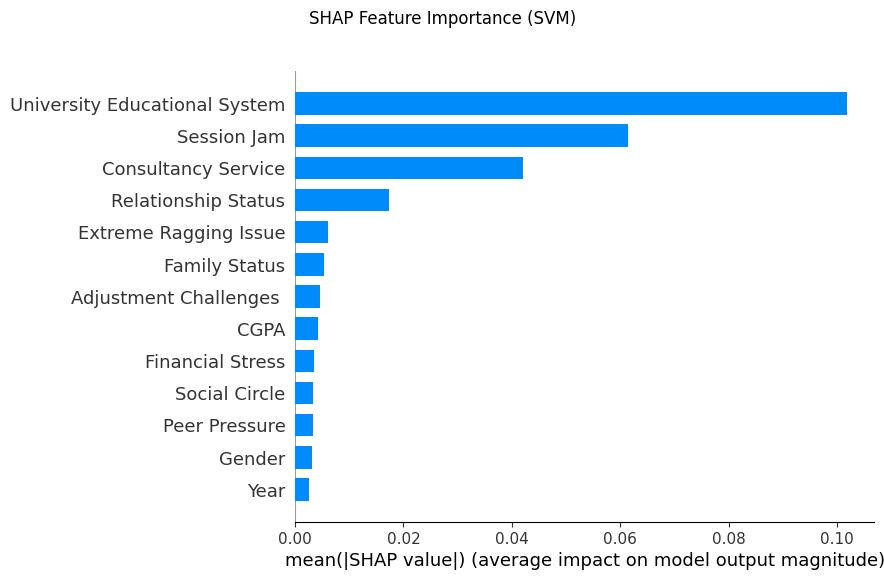

<Figure size 600x400 with 0 Axes>

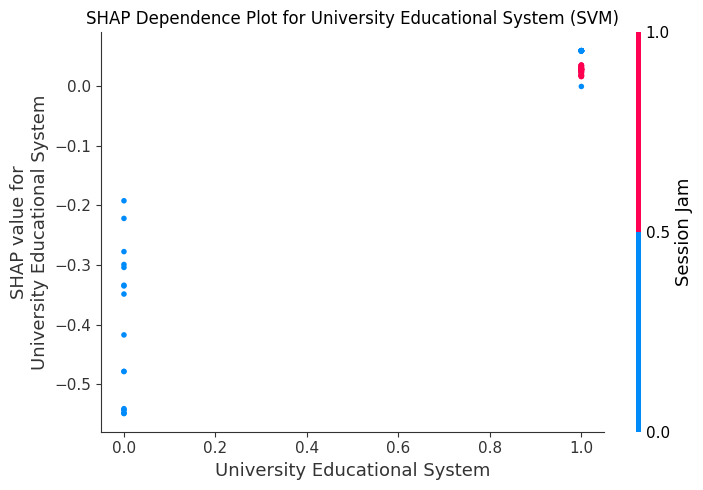

<Figure size 600x400 with 0 Axes>

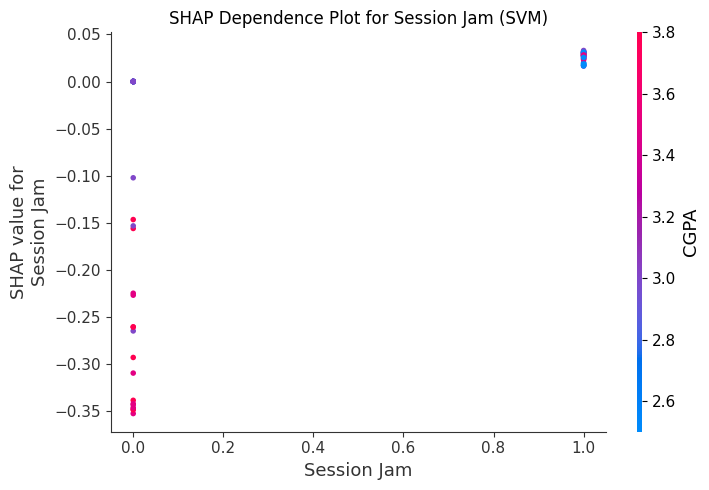


Explaining LogReg with KernelExplainer... (subset of 100 samples)


  0%|          | 0/100 [00:00<?, ?it/s]


Top 10 Features (LogReg):
                          Feature  Mean |SHAP|
10            Consultancy Service     0.040674
12  University Educational System     0.029618
9          Adjustment Challenges      0.020524
8                   Social Circle     0.020400
11                  Peer Pressure     0.014924
2                            CGPA     0.014902
7                     Session Jam     0.014588
6           Extreme Ragging Issue     0.009645
1                            Year     0.007871
5                Financial Stress     0.007742


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


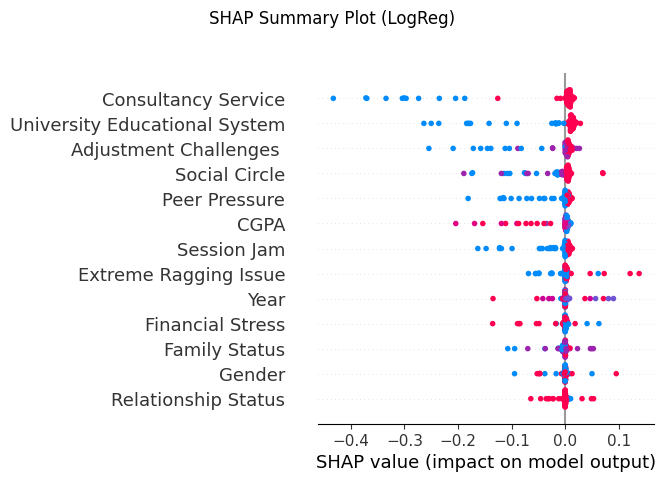

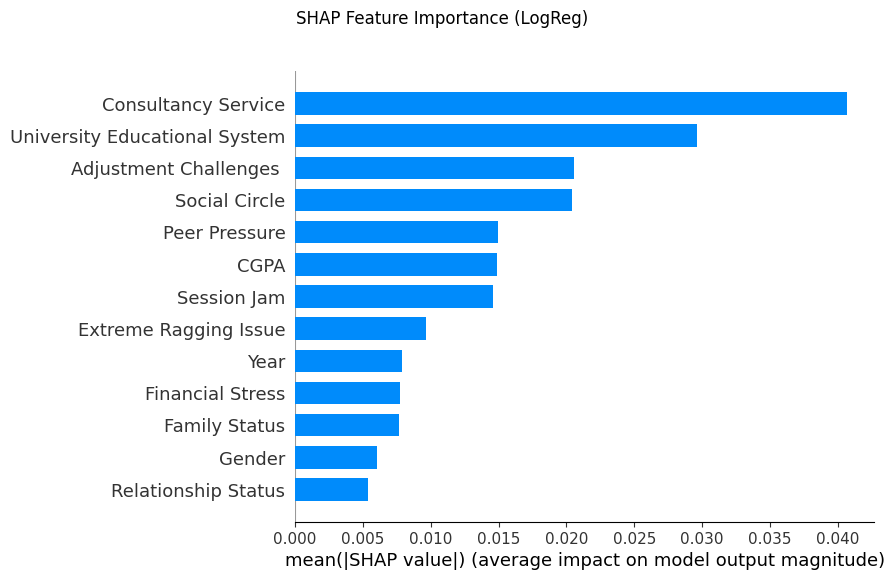

<Figure size 600x400 with 0 Axes>

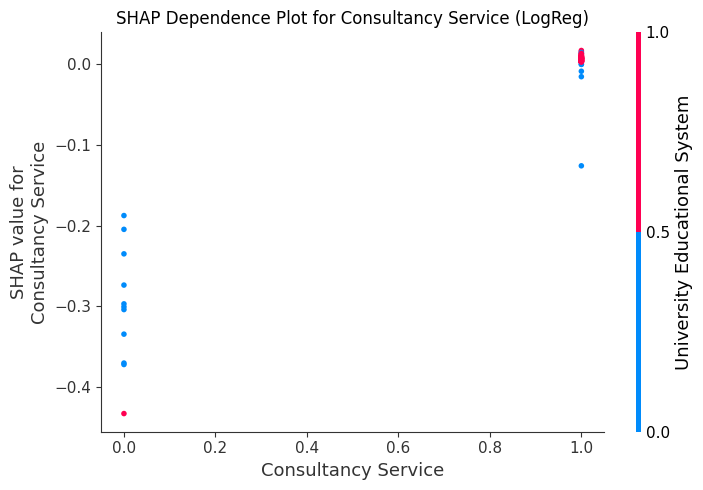

<Figure size 600x400 with 0 Axes>

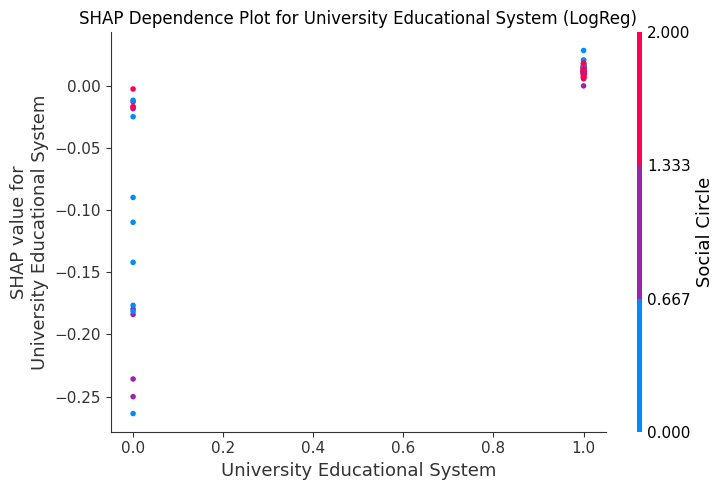


Explaining KNN with KernelExplainer... (subset of 100 samples)


  0%|          | 0/100 [00:00<?, ?it/s]


Top 10 Features (KNN):
                          Feature  Mean |SHAP|
9          Adjustment Challenges      0.035620
12  University Educational System     0.030475
8                   Social Circle     0.029084
7                     Session Jam     0.016658
11                  Peer Pressure     0.015531
10            Consultancy Service     0.015169
6           Extreme Ragging Issue     0.012188
1                            Year     0.011691
3                   Family Status     0.010531
2                            CGPA     0.009267


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


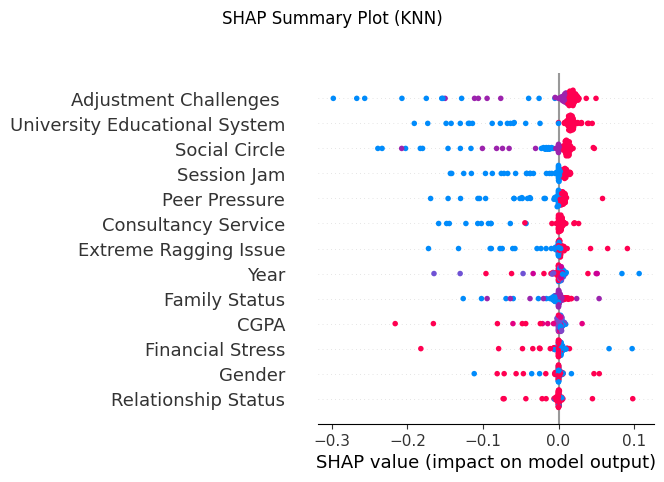

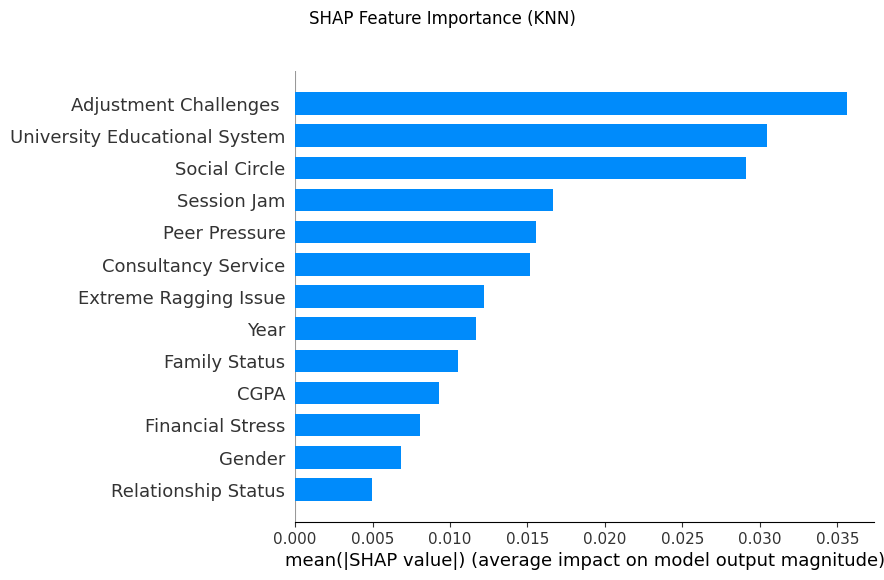

<Figure size 600x400 with 0 Axes>

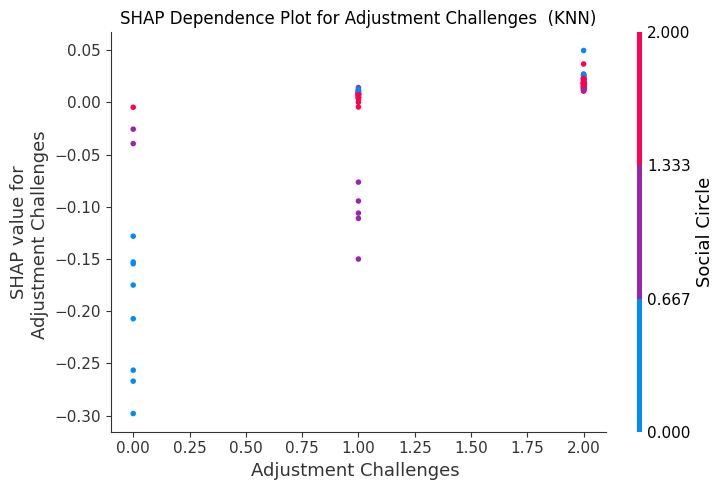

<Figure size 600x400 with 0 Axes>

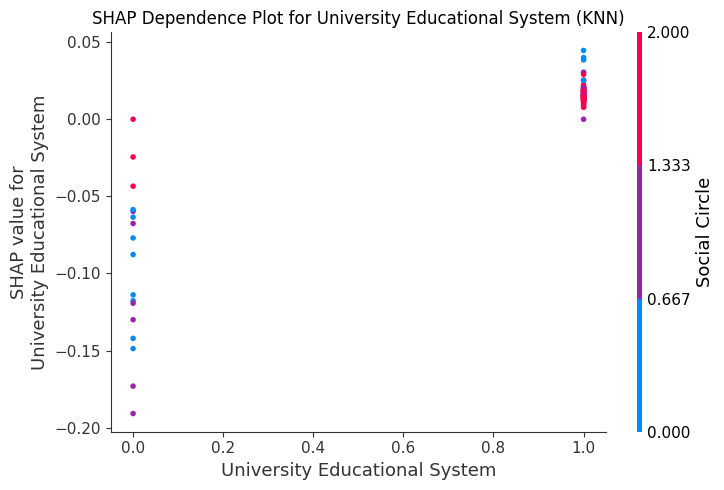

<Figure size 1200x600 with 0 Axes>

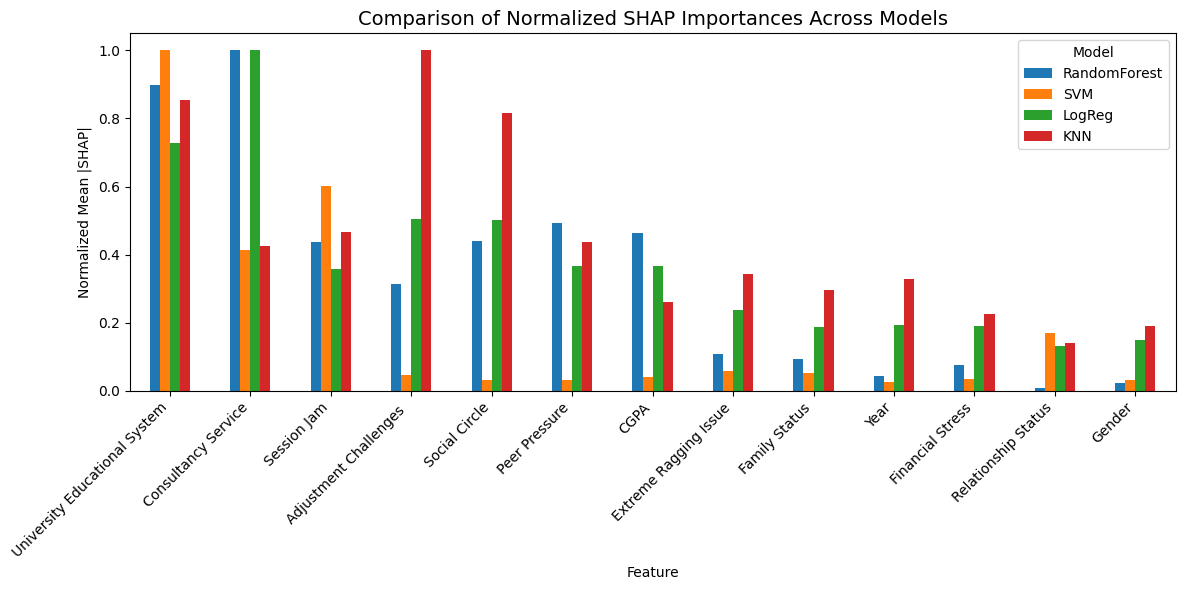


✅ All SHAP results saved in: /content/drive/MyDrive/Sudha-Thesis/SHAP_Plots


In [ ]:
# ==============================
# SHAP Explainability Section
# ==============================

# --- Patch NumPy deprecations for SHAP ---
import numpy as np
if not hasattr(np, 'bool'):
    np.bool = np.bool_
if not hasattr(np, 'float'):
    np.float = np.float64
if not hasattr(np, 'int'):
    np.int = np.int64

import shap
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure DataFrames with correct feature names
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

# Directory to save plots
save_dir = "/content/drive/MyDrive/Sudha-Thesis/SHAP_Plots"
os.makedirs(save_dir, exist_ok=True)

# Helper function
def plot_and_save_shap(shap_vals, data, model_name, features_df):
    """Generate and save SHAP plots for a given model."""
    # Beeswarm
    plt.figure(figsize=(7,5))
    shap.summary_plot(shap_vals, data, show=False, plot_size=(7,5), color_bar=False)
    plt.suptitle(f"SHAP Summary Plot ({model_name})", fontsize=12)
    plt.subplots_adjust(left=0.35)  # prevent label clipping
    plt.tight_layout(pad=2.0)
    plt.savefig(os.path.join(save_dir, f"SHAP_beeswarm_{model_name}.png"),
                dpi=150, bbox_inches="tight")
    plt.show()

    # Bar
    plt.figure(figsize=(9.2,6))
    shap.summary_plot(shap_vals, data, plot_type="bar", show=False,
                      plot_size=(9.2,6), color_bar=False)
    plt.suptitle(f"SHAP Feature Importance ({model_name})", fontsize=12)
    plt.subplots_adjust(left=0.35)
    plt.tight_layout(pad=2.0)
    plt.savefig(os.path.join(save_dir, f"SHAP_bar_{model_name}.png"),
                dpi=150, bbox_inches="tight")
    plt.show()

    # Dependence plots for top 2 features
    top2 = features_df["Feature"].head(2).tolist()
    for feat in top2:
        plt.figure(figsize=(6,4))
        shap.dependence_plot(feat, shap_vals, data, show=False)
        plt.title(f"SHAP Dependence Plot for {feat} ({model_name})")
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"SHAP_dependence_{model_name}_{feat}.png"),
                    dpi=150, bbox_inches="tight")
        plt.show()


# Dictionary to hold all results
all_results = {}

# ==============================
# Random Forest (TreeExplainer)
# ==============================
print("\nExplaining RandomForest with TreeExplainer...")
explainer_rf = shap.TreeExplainer(rf_classifier)
shap_values_rf = explainer_rf.shap_values(X_test_df)
shap_vals_rf = shap_values_rf[1] if isinstance(shap_values_rf, list) else shap_values_rf

mean_abs_shap = np.abs(shap_vals_rf).mean(axis=0)
importance_df_rf = pd.DataFrame({
    "Feature": X.columns,
    "Mean |SHAP|": mean_abs_shap
}).sort_values("Mean |SHAP|", ascending=False)

print("\nTop 10 Features (RandomForest):")
print(importance_df_rf.head(10))

importance_df_rf.to_csv(os.path.join(save_dir, "SHAP_top10_RandomForest.csv"), index=False)
plot_and_save_shap(shap_vals_rf, X_test_df, "RandomForest", importance_df_rf)
all_results["RandomForest"] = importance_df_rf


# ==============================
# KernelExplainer models: SVM, LogReg, KNN
# ==============================
from sklearn.utils import resample

models = {
    "SVM": svm_classifier,
    "LogReg": logreg_classifier,
    "KNN": knn_classifier
}

# Use subset of test set for KernelExplainer
sample = resample(X_test_df, n_samples=100, random_state=42)

for name, model in models.items():
    print(f"\nExplaining {name} with KernelExplainer... (subset of {len(sample)} samples)")
    explainer = shap.KernelExplainer(model.predict, shap.sample(X_train_df, 50, random_state=42))
    shap_vals = explainer.shap_values(sample, nsamples=100)
    shap_vals = shap_vals[1] if isinstance(shap_vals, list) else shap_vals

    mean_abs_shap = np.abs(shap_vals).mean(axis=0)
    importance_df = pd.DataFrame({
        "Feature": X.columns,
        "Mean |SHAP|": mean_abs_shap
    }).sort_values("Mean |SHAP|", ascending=False)

    print(f"\nTop 10 Features ({name}):")
    print(importance_df.head(10))

    importance_df.to_csv(os.path.join(save_dir, f"SHAP_top10_{name}.csv"), index=False)
    plot_and_save_shap(shap_vals, sample, name, importance_df)
    all_results[name] = importance_df


# ==============================
# Combine Results
# ==============================
combined_df = pd.concat(
    [df.assign(Model=name) for name, df in all_results.items()],
    axis=0
)
combined_df.to_csv(os.path.join(save_dir, "SHAP_combined_all_models.csv"), index=False)

# ==========================================
# Comparison of Normalized SHAP Importances
# ==========================================

# Build wide table: rows = features, cols = models
comparison_df = pd.DataFrame(index=X.columns)
for model_name, df_imp in all_results.items():
    s = df_imp.set_index("Feature")["Mean |SHAP|"].reindex(X.columns).fillna(0.0)
    comparison_df[model_name] = s

# Normalize each model’s values to [0,1]
comparison_norm = comparison_df.copy()
for c in comparison_norm.columns:
    maxv = comparison_norm[c].max()
    comparison_norm[c] = 0.0 if maxv == 0 else (comparison_norm[c] / maxv)

# Order features by average normalized importance
feature_order = comparison_norm.mean(axis=1).sort_values(ascending=False).index
comparison_norm = comparison_norm.loc[feature_order]

# Plot
plt.figure(figsize=(12,6))
comparison_norm.plot(kind="bar", figsize=(12,6))
plt.title("Comparison of Normalized SHAP Importances Across Models", fontsize=14)
plt.ylabel("Normalized Mean |SHAP|")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Model")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "SHAP_comparison_all_models.png"),
            dpi=150, bbox_inches="tight")
plt.show()

print(f"\n✅ All SHAP results saved in: {save_dir}")


# Comment3

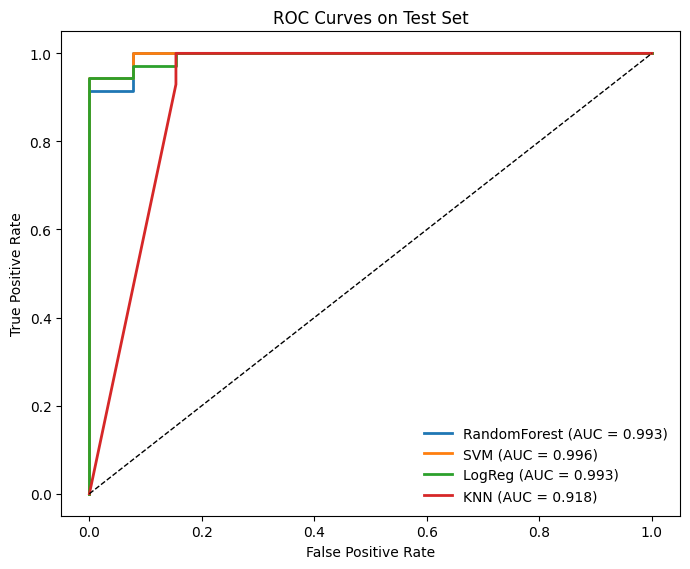

AUC summary:
           Model  AUC_test  AUC_CV_mean  AUC_CV_std
0           KNN  0.917660     0.941322    0.036188
1        LogReg  0.993499     0.993755    0.005874
2  RandomForest  0.993499     0.991790    0.009348
3           SVM  0.995666     0.995055    0.003525


In [ ]:
# ==============================
# ROC–AUC curves + numeric AUCs
# ==============================
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

save_dir = "/content/drive/MyDrive/Sudha-Thesis/Model_Eval"
os.makedirs(save_dir, exist_ok=True)

# Collect your trained models
models = {
    "RandomForest": rf_classifier,
    "SVM":          svm_classifier,       # kernel='linear' (no need for probability=True)
    "LogReg":       logreg_classifier,
    "KNN":          knn_classifier
}

def decision_scores(estimator, X_):
    """
    Return a score vector suitable for ROC–AUC:
    1) decision_function if available,
    2) else positive-class probability.
    """
    if hasattr(estimator, "decision_function"):
        return estimator.decision_function(X_)
    elif hasattr(estimator, "predict_proba"):
        return estimator.predict_proba(X_)[:, 1]
    else:
        # Fallback to predicted labels (not ideal for ROC, but avoids crash)
        return estimator.predict(X_)

# --- Plot ROC on the held-out test set (all models on one figure) ---
plt.figure(figsize=(7, 5.8))
auc_rows = []

for name, est in models.items():
    y_score = decision_scores(est, X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_val = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_val:.3f})")
    auc_rows.append({"Model": name, "AUC_test": auc_val})

# Chance line
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves on Test Set")
plt.legend(loc="lower right", frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "ROC_all_models_test.png"), dpi=150, bbox_inches="tight")
plt.show()

# --- 5-fold CV AUC (on the whole X, y) for robustness ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, est in models.items():
    # scorer='roc_auc' will use decision_function if available, otherwise predict_proba
    cv_auc = cross_val_score(est, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
    auc_rows.append({"Model": name, "AUC_CV_mean": cv_auc.mean(), "AUC_CV_std": cv_auc.std()})

# Save AUC table
auc_df = pd.DataFrame(auc_rows).groupby("Model", as_index=False).max()
auc_df = auc_df[["Model", "AUC_test", "AUC_CV_mean", "AUC_CV_std"]]
print("AUC summary:\n", auc_df)
auc_df.to_csv(os.path.join(save_dir, "AUC_summary.csv"), index=False)


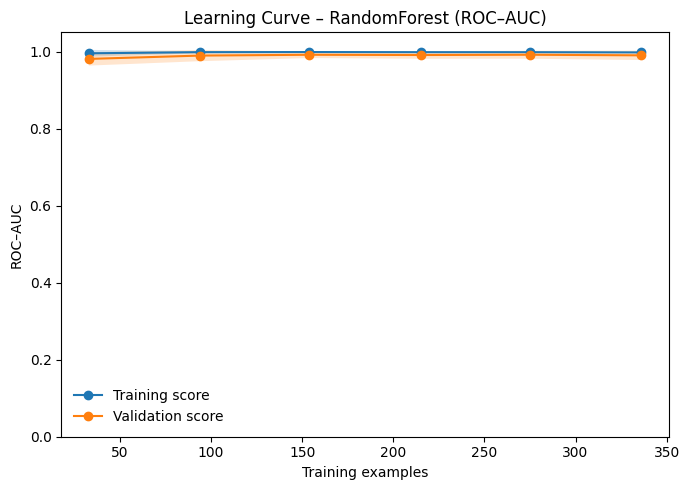

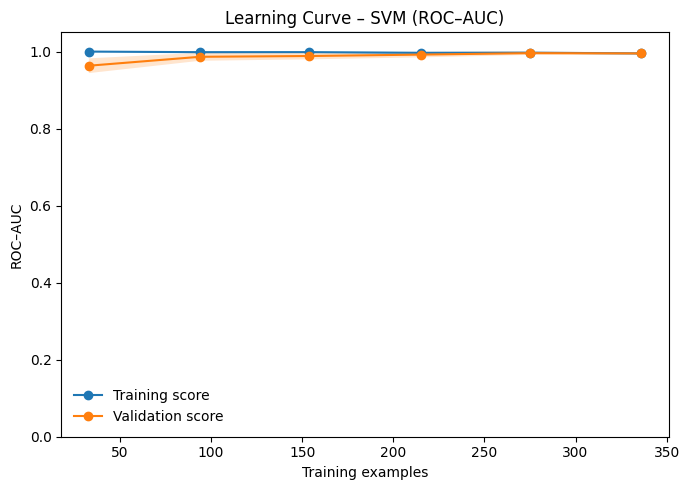

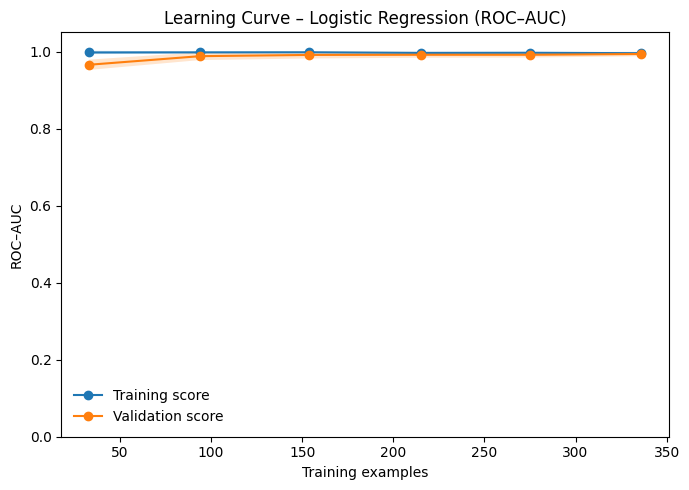

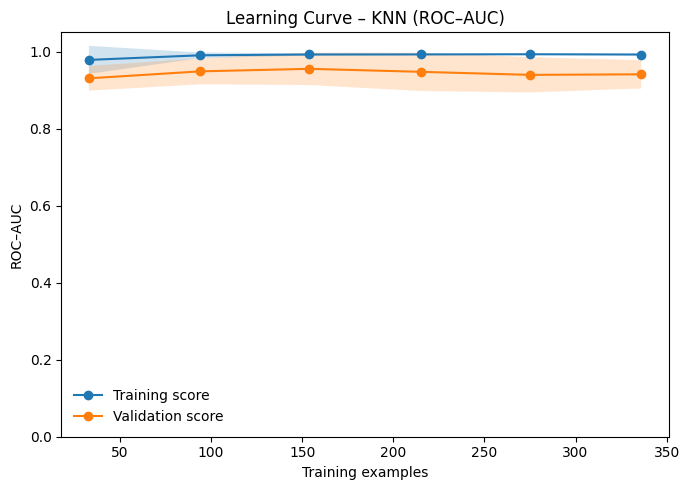

✅ ROC curves, AUC scores, and learning curves saved in: /content/drive/MyDrive/Sudha-Thesis/Model_Eval


In [ ]:
# ==============================
# Learning Curves (ROC–AUC)
# ==============================
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, scoring="roc_auc",
                        train_sizes=np.linspace(0.1, 1.0, 6), cv_splits=5,
                        fig_path=None):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring=scoring,
        train_sizes=train_sizes,
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    train_mean, train_std = train_scores.mean(axis=1), train_scores.std(axis=1)
    val_mean,   val_std   = val_scores.mean(axis=1),   val_scores.std(axis=1)

    plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, "o-", label="Training score")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
    plt.plot(train_sizes, val_mean, "o-", label="Validation score")
    plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)

    plt.xlabel("Training examples")
    plt.ylabel("ROC–AUC")
    plt.ylim(0.0, 1.05)
    plt.title(title)
    plt.legend(loc="best", frameon=False)
    plt.tight_layout()
    if fig_path:
        plt.savefig(fig_path, dpi=150, bbox_inches="tight")
    plt.show()

# One learning-curve plot per model
plot_learning_curve(rf_classifier,   "Learning Curve – RandomForest (ROC–AUC)", X, y,
                    fig_path=os.path.join(save_dir, "LC_RandomForest.png"))

plot_learning_curve(svm_classifier,  "Learning Curve – SVM (ROC–AUC)",          X, y,
                    fig_path=os.path.join(save_dir, "LC_SVM.png"))

plot_learning_curve(logreg_classifier, "Learning Curve – Logistic Regression (ROC–AUC)", X, y,
                    fig_path=os.path.join(save_dir, "LC_LogReg.png"))

plot_learning_curve(knn_classifier,  "Learning Curve – KNN (ROC–AUC)",          X, y,
                    fig_path=os.path.join(save_dir, "LC_KNN.png"))

print(f"✅ ROC curves, AUC scores, and learning curves saved in: {save_dir}")


# Probable Solutions

In [ ]:
import pandas as pd

# Replace 'path_to_csv' with the actual path where your CSV file is located
file_path = "/content/drive/MyDrive/Sudha-Thesis/Prevention_Dataset (2).csv"

# Load the dataset into a DataFrame
df2 = pd.read_csv(file_path)


In [ ]:
df2.columns

Index(['Timestamp',
       'Which will help a Student to get rid of Financial Stress?',
       'Do you think appointing a Psychiatrist on Campus will help students to maintain sound mental health?',
       'How can students handle Peer Pressure?',
       'What can Universities Consider to Mitigate Session Jams?',
       'Dealing with Unsupportive Parents-',
       'How can students overcome Low CGPA?',
       'Which can help to make University Educational System stress free?',
       'How to stop Ragging?',
       'What can married students take steps to manage if she/he is depressed?',
       'What can make a Student Stress Free?',
       'Which can help to make Male Students Stress Free? '],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

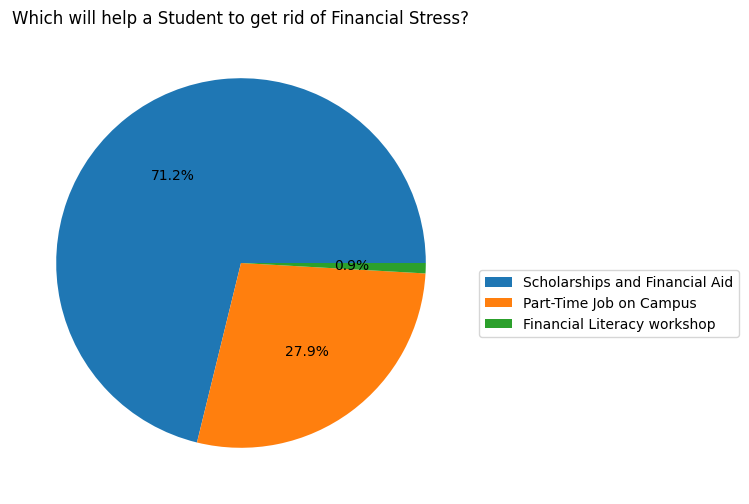

In [ ]:
# Filter the column of interest
financial_stress_column = df2['Which will help a Student to get rid of Financial Stress?']

# Count the occurrences of each option
financial_stress_counts = financial_stress_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(financial_stress_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = financial_stress_counts.index

# Add a custom legend
plt.legend(pie[0], labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('Which will help a Student to get rid of Financial Stress?')
plt.ylabel('')
plt.show()

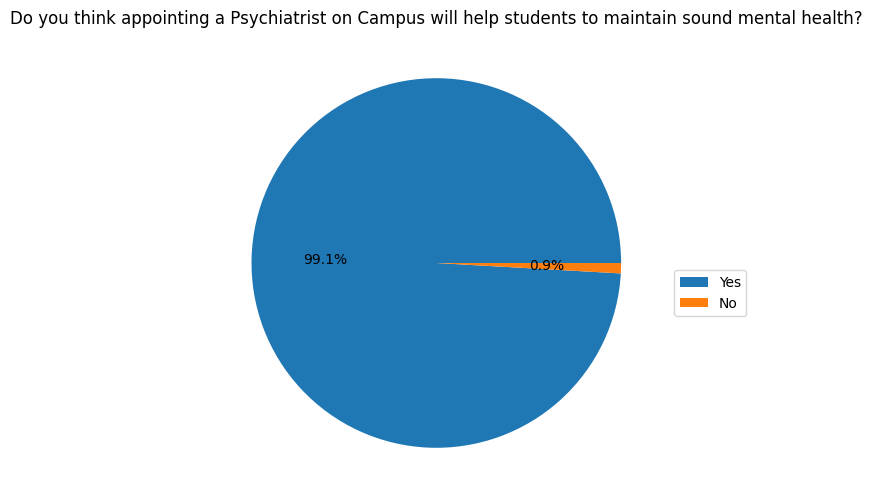

In [ ]:
# Filter the column of interest
psychiatrist_column = df2['Do you think appointing a Psychiatrist on Campus will help students to maintain sound mental health?']

# Count the occurrences of each option
psychiatrist_counts = psychiatrist_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(psychiatrist_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = psychiatrist_counts.index

# Add a custom legend
plt.legend(pie[0], labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('Do you think appointing a Psychiatrist on Campus will help students to maintain sound mental health?')
plt.ylabel('')
plt.show()

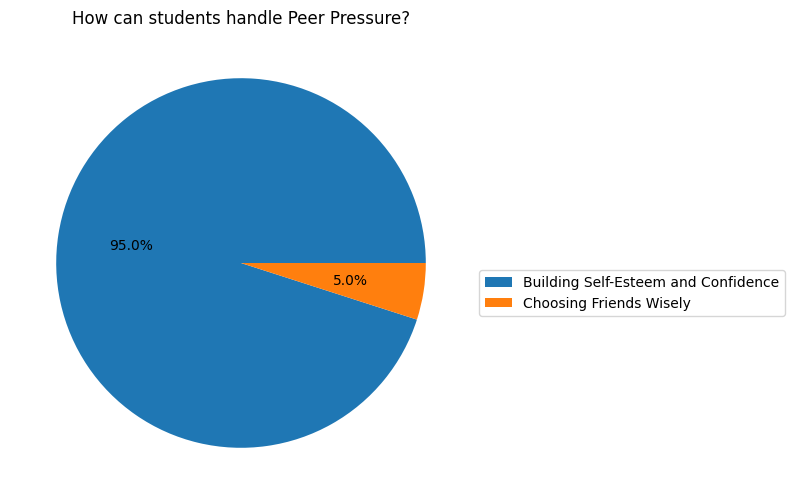

In [ ]:
# Filter the column of interest
peer_pressure_column = df2['How can students handle Peer Pressure?']

# Count the occurrences of each option
peer_pressure_counts = peer_pressure_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(peer_pressure_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = peer_pressure_counts.index

# Add a custom legend
plt.legend(pie[0], labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('How can students handle Peer Pressure?')
plt.ylabel('')
plt.show()

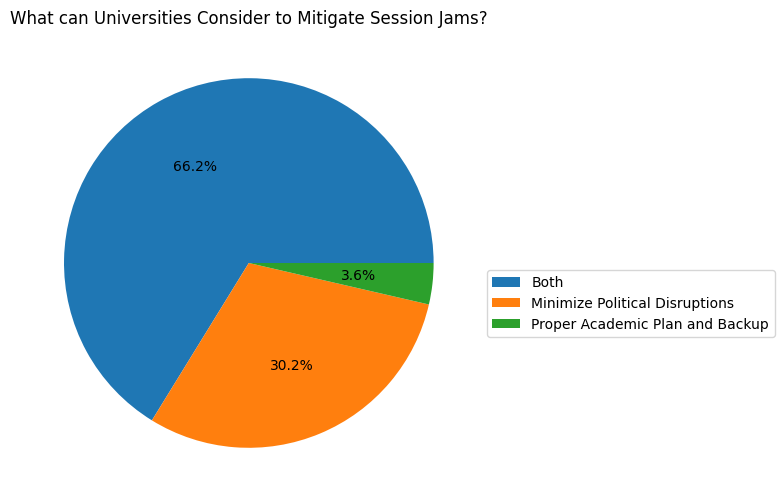

In [ ]:
# Filter the column of interest
session_jams_column = df2['What can Universities Consider to Mitigate Session Jams?']

# Count the occurrences of each option
session_jams_counts = session_jams_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(session_jams_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = session_jams_counts.index

# Add a custom legend
plt.legend(pie[0], labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('What can Universities Consider to Mitigate Session Jams?')
plt.ylabel('')
plt.show()

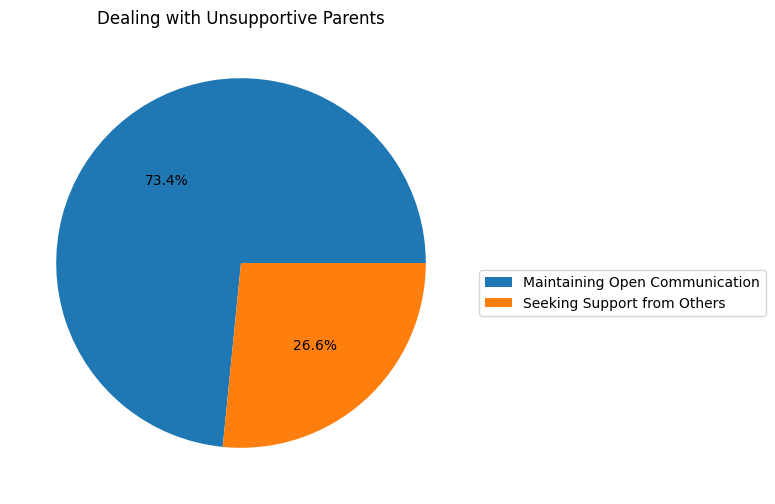

In [ ]:
# Filter the column of interest
unsupportive_parents_column = df2['Dealing with Unsupportive Parents-']

# Count the occurrences of each option
unsupportive_parents_counts = unsupportive_parents_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(unsupportive_parents_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = unsupportive_parents_counts.index

# Add a custom legend
plt.legend(pie[0], labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('Dealing with Unsupportive Parents')
plt.ylabel('')
plt.show()

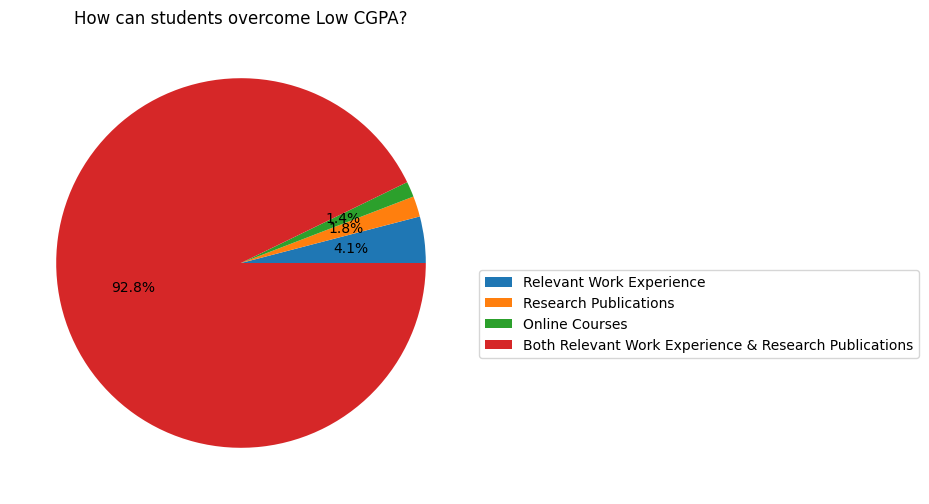

In [ ]:
# Filter the column of interest
low_cgpa_column = df2['How can students overcome Low CGPA?']

# Count the occurrences of each option
low_cgpa_counts = low_cgpa_column.value_counts()

# Keep only the relevant options
relevant_options = ['Relevant Work Experience', 'Research Publications', 'Online Courses', 'A & B']
relevant_counts = low_cgpa_counts[relevant_options]

# Replace 'A & B' with 'Relevant Work Experience & Research Publications Both'
relevant_counts.rename(index={'A & B': 'Both Relevant Work Experience & Research Publications'}, inplace=True)

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(relevant_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = relevant_counts.index

# Add a custom legend
plt.legend(pie[0], labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('How can students overcome Low CGPA?')
plt.ylabel('')
plt.show()

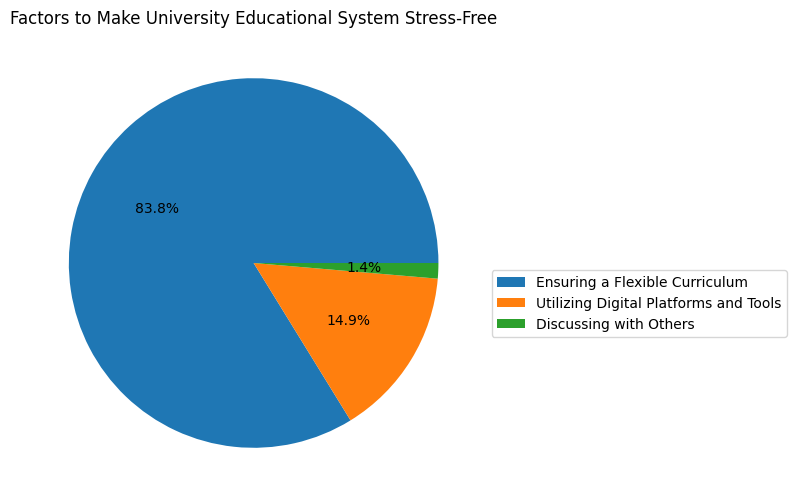

In [ ]:
# Filter the column of interest
edu_system_column = df2['Which can help to make University Educational System stress free?']

# Count the occurrences of each option
edu_system_counts = edu_system_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(edu_system_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = edu_system_counts.index

# Add a custom legend
plt.legend(labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('Factors to Make University Educational System Stress-Free')
plt.ylabel('')
plt.show()


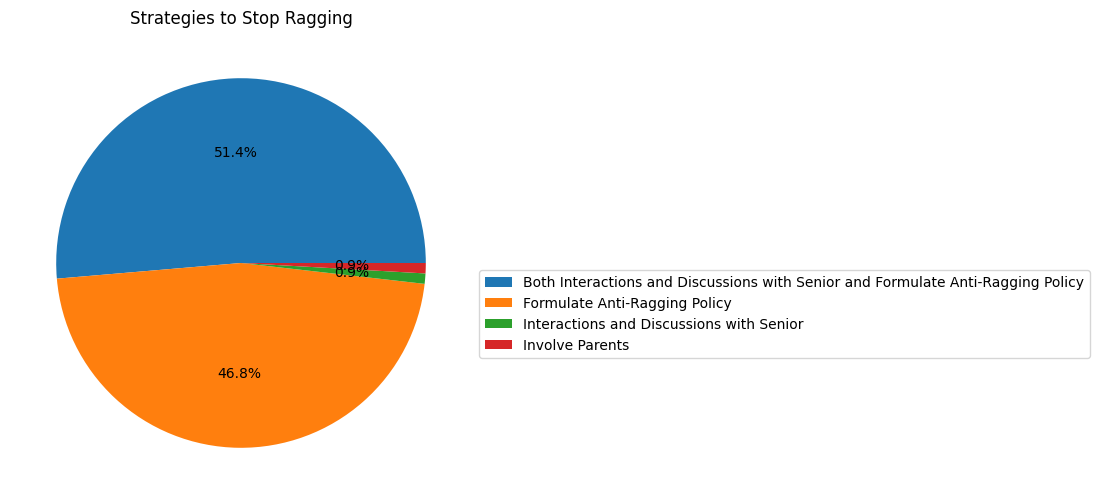

In [ ]:
# Filter the column of interest
ragging_column = df2['How to stop Ragging?']

# Count the occurrences of each option
ragging_counts = ragging_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(ragging_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = ragging_counts.index

# Replace "A & B" with the desired label
labels = ['Both Interactions and Discussions with Senior and Formulate Anti-Ragging Policy' if label == 'A & B' else label for label in labels]

# Add a custom legend
plt.legend(labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('Strategies to Stop Ragging')
plt.ylabel('')
plt.show()

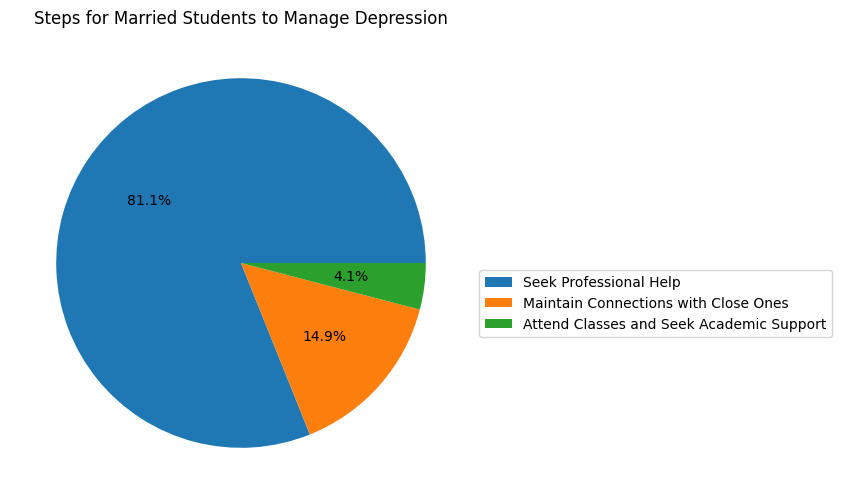

In [ ]:
# Filter the column of interest
married_students_column = df2['What can married students take steps to manage if she/he is depressed?']

# Count the occurrences of each option
married_students_counts = married_students_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(married_students_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = married_students_counts.index

# Replace any labels with desired ones
# (Note: This step can be omitted if the labels are fine as they are)
# labels = [label.replace('Original Label', 'Desired Label') for label in labels]

# Add a custom legend
plt.legend(labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('Steps for Married Students to Manage Depression')
plt.ylabel('')
plt.show()

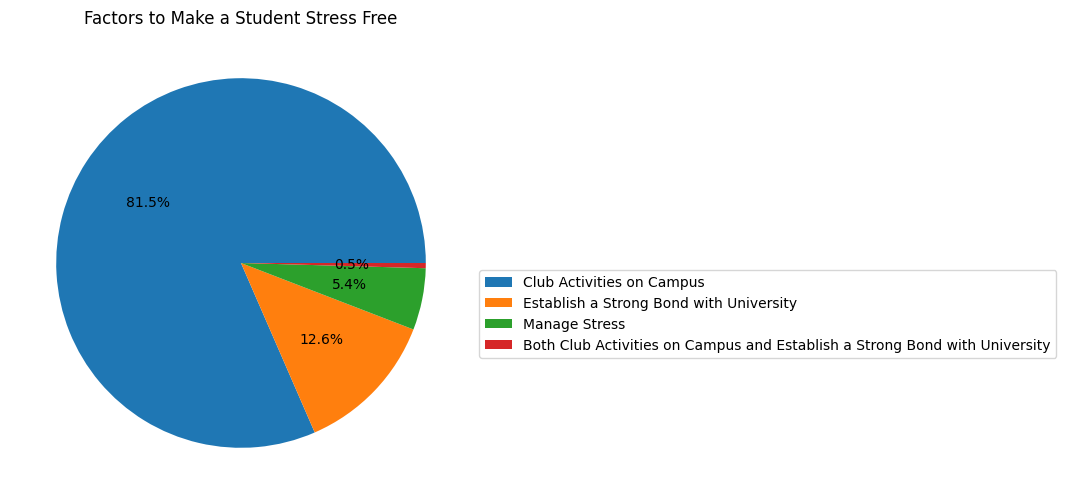

In [ ]:
# Filter the column of interest
stress_free_column = df2['What can make a Student Stress Free?']

# Count the occurrences of each option
stress_free_counts = stress_free_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(stress_free_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = stress_free_counts.index

# Replace 'A & B' with the custom label
custom_labels = ['Club Activities on Campus', 'Establish a Strong Bond with University', 'Manage Stress', 'Both Club Activities on Campus and Establish a Strong Bond with University']

# Add a custom legend
plt.legend(custom_labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('Factors to Make a Student Stress Free')
plt.ylabel('')
plt.show()

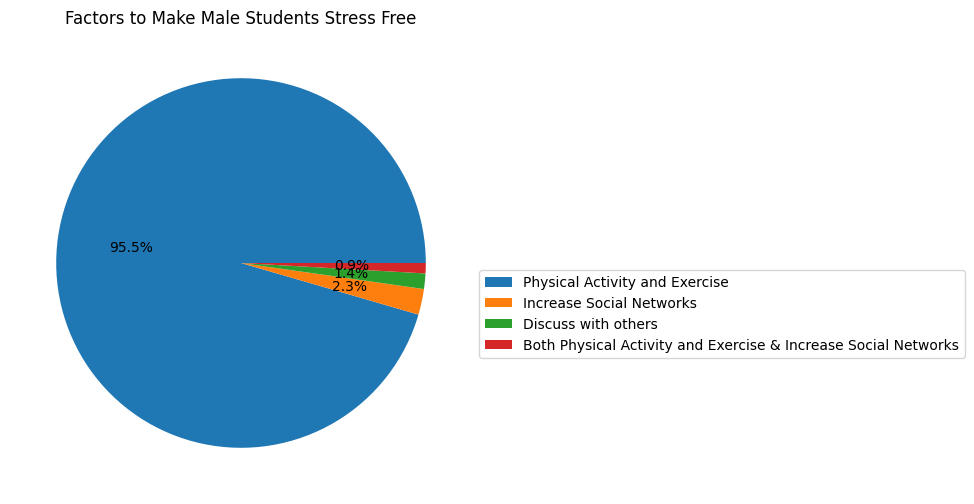

In [ ]:
# Filter the column of interest
male_stress_free_column = df2['Which can help to make Male Students Stress Free? ']

# Count the occurrences of each option
male_stress_free_counts = male_stress_free_column.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie = plt.pie(male_stress_free_counts, autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Extract labels for the legend
labels = male_stress_free_counts.index

# Replace 'A & B' with the custom label
custom_labels = ['Physical Activity and Exercise', 'Increase Social Networks', 'Discuss with others', 'Both Physical Activity and Exercise & Increase Social Networks']

# Add a custom legend
plt.legend(custom_labels, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.title('Factors to Make Male Students Stress Free')
plt.ylabel('')
plt.show()